<a href="https://colab.research.google.com/github/RonenDotan/colab/blob/main/JobInterviewPreperation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Links

Spark Notebook: https://colab.research.google.com/drive/1EK_1tndnOiZh3YRe1r6f-HmkJrbOyXCk#scrollTo=VT3jUBYLRoo-&uniqifier=1

Pandas: https://colab.research.google.com/drive/1idoXt8V6QfQGzHuHv1HLuOrreZ_FRPvA


# Init

In [ ]:
!pip install -q aiosqlite

In [ ]:
# Init
from typing import List
import unittest
import itertools
import numpy as np
import functools
from enum import Enum
import asyncio
import time
import matplotlib.pyplot as plt
import pprint
import pandas as pd

pp = pprint.PrettyPrinter(indent=4)
print("Modules Imported")

def is_notebook() -> bool:
    try:
        shell = get_ipython().__class__.__name__
        if shell == 'ZMQInteractiveShell':
            return True   # Jupyter notebook or qtconsole
        elif shell == 'TerminalInteractiveShell':
            return False  # Terminal running IPython
        elif shell == 'Shell':
            return True # Colab
        else:
            return False  # Other type (?)
    except NameError:
        return False      # Probably standard Python interpreter

Modules Imported


#Question Fintastic

Open Questions
------
1. Multiprocessing vs threads
2. What is GIL
3. CAP theorem - https://en.wikipedia.org/wiki/CAP_theorem
4. Complexity for sorting array.<br> Can be o(nlogn)


Coding Question
----
* Given a text, count the unique words
* Top 5 repeating unique words
* list of all words that are polindrome

In [ ]:
from collections import Counter

text = """
packages right she put money part want garret message joy thing real shy how check when wholly
many situation drawings really felt built its boy something weeks by juvenile Admitting any are His
denoting still we of met ecstatic wife it had come to estimating but of body very mile therefor incommode excited her to Her around like but few Can remarkably two doubtful by we
favour questions set county water now will making forming do at By offending said an too remaining Hard disposed humoured
need answered compact at Unpleasant what mutual had the breakfast up you indeed up
these genius no that warmly six True it not On blessing mean village at true concealed dependent
uneasy lady agreement assured an mirth has good Home The fat aften nay here wholly juvenile taste yet going mr
Entrance her advice up knew Answer length desirous Am one though wish pretty get got by children pleasure
simplicity can been took silent says he besides disposing really how Goodness Polite produce who asked rapid have An are was after get must mr who on draw does carriage wants peculiar
hence own yet way Houses it no back mrs Winter simple formerly stood On fact good knows middleton friends
and no on me announcing mrs ask Likewise does with laughing came The you Depending during Handsome mr just wrong bred great packages Own two suspected in sing said in no match
Attended why saw Could terms my in Sir their had she of ecstatic so
valley ye new mirth Led people understood she explained felicity though dwelling because inhabiting painful why Felicity for strangers
material now reasonably preserved explained contented stronger out wished on our old
come nor strictly men mr wound do right shoud put such wondered did your an they So Started
expense attention people pleasant ham set do middletons my leave remove and curiosity today indeed
concluded my am strongly him has above may off perceived call friendship doubt first in unsatiable narrow oh songs she eat met see between or be decisively do wont found mr
favourite mrs Spite u Rich against from valley about may shortly next face Our and mrs dried set
pianoforte totally for horrible him views oh dine enquire speaking so sake be drawn miss Garden newspaper bad if Melancholy dull in continual Collected over Sportsman an Written yet mrs
existence His why entreaties now seems of ye of Projecting case no evening speedily apartments hope at over via get into an september
jokes Then friendly pure fulfilled half as west design four had his otherwise fine near he was she  Thoughts much he no as although
Welcomed he steepest all excuse some how him reserved delivered be by offended get Mrs led Dejection
she for cant become but agreeable greatest in if only valley within gay on
suitable in Rich will should there disposal snug as in so more out high led Oh then going
Direct performed easily or barton nay say other Dashwood yet ye time might gay having hearing through Preferred its Nay
temper can What saw happening steepest barton yet make it need offices jennings could newspaper uneasy him
forming Inquietude out he thus ask little Money forming ample for Necessary ought not hundred though Prepared finished all as or Subjects until Hearts elsewhere besides why put
shameless We old is am in whom he partiality Evil ten wish Continuing means Total simplicity so in our weddings agreed mother
up so feeling expense said this stronger society so an misery blush weeks Dear compliment once thanks west supposing this speaking since merely itself at kept early
if his law or or tended Recommend you departure melancholy again him too should hence are are residence dear appearance He
an post latter next stop warmth on attacks accused dull throwing you can would but
moment Off great being has like in Neglected is no Chicken ten humoured he so end ye so suitable new on an
projection they do down deal you ecstatic on ye you his Not relation every trifling on up true than whole ago those sufficient to less are china things pianoforte guest
be Express make it first favourable bed Visited one directly him keepf rapturous roof wooded joy am Full mean
begin am one come a ya offering over it Ham simplicity held unknown passed matter get
prudent myself Remain pleasure mean prevailed reserved true plan of believe yesterday no know garden
where formerly like had as i use exercise zealously poor do giving position so formed ought sufficient six
Nor happy entire an He neither me sent Rose am questions to since to terminated By begin them Entered little wife taat
"""


text = text.replace('\n', '')
words = text.split(' ')
counterWords = Counter(words)
print(f'* - Total Words: {len(counterWords)}')
print(f'* - Top 5 Words: {sorted(counterWords, key=counterWords.get)[:5]}')
print(f'* - Polindroms: {list(filter(lambda word: word == word[::-1],counterWords.keys()))}')

* - Total Words: 517
* - Top 5 Words: ['money', 'part', 'want', 'garret', 'message']
* - Polindroms: ['did', 'u', '', 'a', 'i', 'taat']


# Question 1 - 40 mins - Escape Matrix

You are trapped in a deadly escape room and have to navigate your way out.
You must start at the 'starting points' (see below), find the key, and then you can search for the exit. You can only move left, right, up or down (no diagonal steps).
Write a function that gets a 'room' parameter and returns true if you can escape the room and false otherwise.

The 'room' parameter is an array of characters, each represents a different element:
* 'o' - represents an open passage.
* 'x' - represents a wall.
* 's' - represents the starting point.
* 'e' - represents the ending point.
* 'k' - represents the key.

For Example, in the following room:

```
[
    ['s', 'o','o','o'],
    ['x','x','o','x'],
    ['k','o','o','e'],
    ['o','x','x','x']
]
```
You have a way to reach the key and escape, therefore the function should return true.

In this room:
```
[
    ['s', 'o','o','o'],
    ['x','o','o','o'],
    ['k','o','x','x'],
    ['o','x','x','e']
]
```
There's no way to reach the ending points, therefore the function should return false.
Note, not all escape rooms are fair. In some you might not even have a key!

**Test Cases:**
```
2.
[
    ['s','x','e','o','k'],
    ['o','x','x','x','o'],
    ['o','o','x','o','o'],
    ['x','o','o','o','x']
]
true

3.
[
    ['s','x','e','x','k'],
    ['o','x','x','x','o'],
    ['o','o','x','o','o'],
    ['x','o','o','o','x']
]
false

4.
[
    ['o','o','o','o','x','k','o'],
    ['o','x','x','o','x','x','o'],
    ['o','x','o','o','o','x','o'],
    ['o','x','o','s','o','x','o'],
    ['o','x','x','o','x','x','o'],
    ['o','x','x','x','x','x','o'],
    ['o','o','e','o','o','o','o']
]
true

5.
[
    ['o','o','o','o','x','k','o'],
    ['o','x','x','o','x','x','o'],
    ['o','x','o','o','o','x','x'],
    ['o','x','o','s','o','x','o'],
    ['o','x','x','o','x','x','o'],
    ['o','x','x','x','x','x','o'],
    ['o','o','e','o','o','o','o']
]
false

6.
[
    ['o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','e'],
    ['o','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x'],
    ['o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','k','o','o','o','o'],
    ['x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','o'],
    ['o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o'],
    ['o','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x'],
    ['o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o'],
    ['x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','o'],
    ['o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o'],
    ['o','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x'],
    ['o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o'],
    ['x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','o'],
    ['s','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o']
]
true

7.
[
    ['o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','x','e'],
    ['o','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x'],
    ['o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','k','o','o','o','o'],
    ['x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','o'],
    ['o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o'],
    ['o','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x'],
    ['o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o'],
    ['x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','o'],
    ['o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o'],
    ['o','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x'],
    ['o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o'],
    ['x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','o'],
    ['s','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o']
]
false

8.
[
    ['o','s','e'],
    ['o','o','o'],
    ['o','o','o'],
    ['o','o','o'],
    ['o','o','o']
]
false
```

In [ ]:
# Question 1 - Can Escape Matrix?
class ElementInRoom(Enum):
    Open = 'o'
    Wall = 'x'
    Start = 's'
    End = 'e'
    Key = 'k'

def search_pos(room: List[List[ElementInRoom]], element_to_search:ElementInRoom) -> tuple:
    for i, row in enumerate(room):
        for j, cell in enumerate(row):
            if cell == element_to_search.value:
                return (i,j)



def can_escape(room: List[List[ElementInRoom]]):
    elements_to_search = [ElementInRoom.Key.value,ElementInRoom.End.value]
    possible_steps = [(0,1),(0,-1),(1,0),(-1,0)]
    np_mat = np.matrix(room)

    start_pos = search_pos(room, ElementInRoom.Start)
    rooms_visited = [start_pos]

    def can_escape(curr_pos) -> bool:
        for curr_step in possible_steps:
            new_position = tuple(map(lambda i, j: i + j, curr_pos, curr_step))
            if  0 <= new_position[0] and new_position[0] < np_mat.shape[0] and 0 <= new_position[1] and new_position[1] < np_mat.shape[1]:
                if new_position not in rooms_visited:
                    if np_mat[new_position] == ElementInRoom.Wall.value:
                        pass
                    else:
                        rooms_visited.append(new_position)
                        if np_mat[new_position] in elements_to_search:
                            elements_to_search.remove(np_mat[new_position])
                            if len(elements_to_search) == 0:
                                #print('found')
                                return True

                        if can_escape(new_position):
                            return True
    if can_escape(start_pos):
        return True
    else:
        return False





def dev():

    assert can_escape([
    ['s', 'o','o','o'],
    ['x','x','o','x'],
    ['k','o','o','e'],
    ['o','x','x','x']
]) == True

    assert can_escape([
    ['s', 'o','o','o'],
    ['x','o','o','o'],
    ['k','o','x','x'],
    ['o','x','x','e']
    ]) == False


dev()


def test_case():
    assert can_escape([['s','e','k']]) == True

    assert can_escape([
    ['s','x','e','o','k'],
    ['o','x','x','x','o'],
    ['o','o','x','o','o'],
    ['x','o','o','o','x']
]) == True

    assert can_escape([
    ['s','x','e','x','k'],
    ['o','x','x','x','o'],
    ['o','o','x','o','o'],
    ['x','o','o','o','x']
]) == False

    assert can_escape([
    ['o','o','o','o','x','k','o'],
    ['o','x','x','o','x','x','o'],
    ['o','x','o','o','o','x','o'],
    ['o','x','o','s','o','x','o'],
    ['o','x','x','o','x','x','o'],
    ['o','x','x','x','x','x','o'],
    ['o','o','e','o','o','o','o']
]) == True

    #5
    assert can_escape([
    ['o','o','o','o','x','k','o'],
    ['o','x','x','o','x','x','o'],
    ['o','x','o','o','o','x','x'],
    ['o','x','o','s','o','x','o'],
    ['o','x','x','o','x','x','o'],
    ['o','x','x','x','x','x','o'],
    ['o','o','e','o','o','o','o']
]) == False

    #6
    assert can_escape([
    ['o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','e'],
    ['o','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x'],
    ['o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','k','o','o','o','o'],
    ['x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','o'],
    ['o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o'],
    ['o','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x'],
    ['o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o'],
    ['x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','o'],
    ['o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o'],
    ['o','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x'],
    ['o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o'],
    ['x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','o'],
    ['s','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o']
]) ==  True

    #7
    assert can_escape([
    ['o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','x','e'],
    ['o','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x'],
    ['o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','k','o','o','o','o'],
    ['x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','o'],
    ['o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o'],
    ['o','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x'],
    ['o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o'],
    ['x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','o'],
    ['o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o'],
    ['o','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x'],
    ['o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o'],
    ['x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','o'],
    ['s','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o','o']
]) == False

    #8
    assert can_escape([
    ['o','s','e'],
    ['o','o','o'],
    ['o','o','o'],
    ['o','o','o'],
    ['o','o','o']
]) == False

test_case()

print("Finished Successfully!")

Finished Successfully!


# Question 3 - Find Element
15 mins

Please implement a function called findElement.
The function receives a matrix of integers and a target integer as input, and returns a boolean value indicating if the target integer is present in the matrix or not.
Please do not use a built-in function for sorting or finding elements in arrays.

For example, given the matrix:
```
[
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]
```
and the target integer 5, the function should return 'true'.

matrix =
```
[
    [1, -2],
    [-3, 4]
]
```
target = 7

Output: false



**Test Cases:**

[
[-3, 7, 9],
[-11, 105, -52],
[0, 3, 72]
]  -> true


-9, -12\n14, 24. Target 6 → false

2, 0, 0, 7\n44, -2, 15, 1. Target 3 → false

5, 13, -10, 7\n0, 16, 0, -9. Target 0. → true

-15, 2, 3, 4, 15, 2, 7, 18, 9, 1\n10, 95, 80, 17, 80, 75, -70, 45, 60, 55\n-3, -6, -9, -22, -15, -18, -29, -24, -27, 38\n50, -36, -11, -18, 37, 49, -27, -18, -28, 40\n7, -47, 27, 36, 24, 32, 10, 37, -17, -27\n49, 4, 36, -23, 5, -45, 27, -9, 0, 26\n21, -19, -11, 24, 49, -19, 1, -7, -43, -47\n-4, 24, 21, 0, 49, -5, 1, 38, -45, -36\n42, -31, 46, 25, 4, 19, -10, -17, -41, 49\n15, -7, -16, 20, 20, -17, -57, 9, -3, 41. Target -57. –> true


In [ ]:
# Question 3 - FindElement
def findElement(input_mat: [int], target: int) -> bool :
    for i in input_mat:
        for j in i:
            if j == target:
                return True
    return False


def for_dev():
    case_1 = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
    target_1 = 5
    findElement(case_1, target_1)

def test_answer():
    assert findElement([[-3, 7, 9],[-11, 105, -52],[0, 3, 72]],0) == True
    assert findElement([[1, 2, 3], [4, 5, 6], [7, 8, 9]],5) == True
    assert findElement([[-9, -12],[14, 24]],6) == False
    assert findElement([[2,0,0,7],[44, -2, 1]],3) == False
    assert findElement([[5, 13, 10,7],[0, 16, 0, -9]],0) == True
    assert findElement([[-15, 2, 3, 4, 15, 2, 7, 18, 9, 1],[10, 95, 80, 17, 80, 75, -70, 45, 60, 55],[-3, -6, -9, -22, -15, -18, -29, -24, -27, 38],[50, -36, -11, -18, 37, 49, -27, -18, -28, 40],[7, -47, 27, 36, 24, 32, 10, 37, -17, -27],[49, 4, 36, -23, 5, -45, 27, -9, 0, 26],[21, -19, -11, 24, 49, -19, 1, -7, -43, -47],[-4, 24, 21, 0, 49, -5, 1, 38, -45, -36],[42, -31, 46, 25, 4, 19, -10, -17, -41, 49],[15, -7, -16, 20, 20, -17, -57, 9, -3, 41]],-57) == True


for_dev()
test_answer()

print("Finished Successfully")


Finished Successfully


# Question 4 - matrixRotation
30 mins

Please implement a function called matrixRotation.

The function receives a matrix of integers as input, rotates it 90 degrees clockwise, and returns the rotated matrix as output.

For example, given the matrix:
```
[
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]
```
The function should return:
```
[
    [7, 4, 1],
    [8, 5, 2],
    [9, 6, 3]
]
```


Also:
```
[
    [1, -2],
    [9, 3]
]

Return
[
    [9, 1],
    [3, -2]
]
```


**Second Part**

If you were to receive another parameter, K, which indicates how many times you need to rotate the matrix (i.e., k = 1 means rotate once, k = 2 means rotate twice, etc.).

how would you change your code?



In [ ]:
# Question 4 - matrixRotation
def matrixRotation(input_matrix : List[List[int]]) -> List[List[int]]:
    output = []
    for index, cell in enumerate(reversed(input_matrix)):
        for jindex, cell_p in enumerate(cell):
            if index == 0:
                output.append([0 for i in input_matrix])
            output[jindex][index] = cell_p

    return (output)

def for_dev():
    input1 = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
    output_expected = [[7, 4, 1], [8, 5, 2], [9, 6, 3]]
    actual_output = matrixRotation(input1)

    assert output_expected == actual_output
    assert  matrixRotation([[1, -2],[9, 3]]) ==  [[9, 1],[3, -2]]

def test_answer():
    assert  matrixRotation([[1, -2, 7],[7, 32, -5],[2, 0, 14]]) == [[2, 7, 1],[0, 32, -2],[14, -5, 7]]
    assert  matrixRotation([[5, 5, 7],[0, -3, 11]]) == [[0, 5],[-3, 5],[11, 7]]

    assert  matrixRotation(
[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],[100, 95, 90, 85, 80, 75, 70, 65, 60, 55],[-3, -6, -9, -12, -15, -18, -21, -24, -27, -30],[5, -36, -11, -11, 34, 49, -27, -18, -28, 47],[7, -47, 27, 35, 24, 32, 20, 37, -47, -27],[48, 4, 46, -25, 4, -45, 27, -9, 0, 39],[-23, -18, -11, 24, 49, -33, 1, -7, -43, -47],[-4, -24, 21, 9, 49, -5, 1, 38	, -49, -36],[42, -35, -46, 25, 4, 31, -10	, -17, -41, 49],[15, 47, -6, 20, 20, -7, 26, 9, -31, -41]]) == [[15, 42, -4, -23, 48, 7, 5, -3, 100, 1],[47, -35, -24, -18, 4, -47, -36, -6, 95, 2],[-6, -46, 21, -11, 46, 27, -11, -9, 90, 3],[20, 25, 9, 24, -25, 35, -11, -12, 85, 4],[20, 4, 49, 49, 4, 24, 34, -15, 80, 5],[-7, 31, -5, -33, -45, 32, 49, -18, 75, 6],[26, -10, 1, 1, 27, 20, -27, -21, 70, 7],[9, -17, 38, -7, -9, 37, -18, -24, 65, 8],[-31, -41, -49, -43, 0, -47, -28, -27, 60, 9],[-41, 49, -36, -47, 39, -27, 47, -30, 55, 10]]



def second_part(k :int):
    results_sets = []
    results_sets.append([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
    index = 1
    while (index < k):
        curr_results = matrixRotation(results_sets[index-1])
        if results_sets[0] == curr_results:
            return results_sets[k % index]
        else:
            results_sets.append(curr_results)
            index += 1

    return results_sets[index-1]


test_answer()

def test_answer2():
    assert second_part(6) == matrixRotation(matrixRotation(matrixRotation(matrixRotation(matrixRotation(matrixRotation([[1, 2, 3], [4, 5, 6], [7, 8, 9]]))))))

test_answer2()

print("Finished Successfully")

Finished Successfully


# Question 5 - Snake
45 mins

In the game of Snake, a player controls a snake-shaped creature around a bordered plane.

The snake has a specific length, so there is a moving tail found a set number of units apart from the snake's head.
When the snake-head bumps into its body, the edges of the board or an obstacle, the game is over.
When the snake-head bumps into food - its tail grows longer by 1 unit (making the game increasingly difficult).
The player controls the snake using the keys up, right, down or left.

In this question, you are required to implement a function that gets a <u>game board</u> and a <u>series of inputs</u> from a player as parameters, and returns the <u>future outcome of the game</u> after applying all the required steps.

The outcome should be one of the following:
* "game over" - the application of the player's inputs caused the  snake-head to bump into its body, an edge of the board or a obstacle.
* "food" - the application of the player's inputs caused the  snake-head to bump into food.
* "no change" - the application of the player's inputs hasn't caused any of these two events (the snake-head has not bumped into food nor has it bumped into a obstacle or its body).

<u>The function's two parameters:</u>
* Board - a two dimensional array of characters, each represents a different element in the game:
    * 's': the snake's body
    * 'S' (capital 's'): the snake's head
    * 'f': food
    * '-': an empty slot on the board
    * 'x': an obstacle
* Player input - an array of characters, each represents the next action to be performed: 'u' (up), 'r' (right), 'd' (down), 'l' (left).
Note: the same action can be repeated more than once in a row. The meaning of such a repetition is to keep moving in the same direction.

**Examples:**
```
Input:
[
    ['-','x','-','-','-'],
    ['-','x','-','f','-'],
    ['-','x','-','-','-'],    
    ['-','s','s','S','-'],    
    ['x','x','x','x','x']
]
```

* Case 1:

Input: ['u','u']

The snake's head will go up two times, eat the food and stay alive (note that after eating the food, the snake's tail grew by one unit).
result:
```
[
    ['-','x','-','-','-'],
    ['-','x','-','S','-'],
    ['-','x','-','s','-'],    
    ['-','-','s','s','-'],    
    ['x','x','x','x','x']
]
```

And return the string "Food"

------------------------------
* Case 2:

Input ['u', 'l', 'u']

The snake's head will go up one time, turn to the left one time and go up once again.
```
[
    ['-','x','-','-','-'],
    ['-','x','S','f','-'],
    ['-','x','s','s','-'],    
    ['-','-','-','-','-'],    
    ['x','x','x','x','x']
]
```
Result: No Change


**Test Cases:**
```
1.
[
    ['-','x','-','-','-'],
    ['-','x','-','f','-'],
    ['-','x','-','-','-'],
    ['-','s','s','S','-'],
    ['x','x','x','x','x']
],
['u','r','u','l']
'food'
2.
[
    ['-','x','-','-','-'],
    ['-','x','-','f','-'],
    ['-','x','-','-','-'],
    ['-','s','s','S','-'],
    ['x','x','x','x','x']
],
['u','l','u','u','r','r','d','l']
'food'
3.
[
    ['-','x','-','-','-'],
    ['-','x','-','f','-'],
    ['-','x','-','-','-'],
    ['s','s','s','s','S'],
    ['x','x','x','x','x']
],
['u','r','d','l']
'game over'
4.
[
    ['-','x','-','-','-'],
    ['-','x','-','f','-'],
    ['-','x','-','-','-'],
    ['s','s','s','s','S'],
    ['x','x','x','x','x']
],
['u','u','u','l','l','d','d','r]'
'no change'
5.
[
    ['-','-','-','-','-','-'],
    ['s','s','s','s','s','S'],
    ['-','-','-','-','-','-'],
    ['-','-','-','-','-','-']
],
['d','d','l','l','l','l','u']
'no change'




Example 1
Ending Board:
[['x' 'x' 'x' 'x' 'x' 'x' 'x']
 ['x' '-' 'x' '-' '-' '-' 'x']
 ['x' '-' 'x' '-' 'S' '-' 'x']
 ['x' '-' 'x' '-' 's' '-' 'x']
 ['x' '-' '-' 's' 's' '-' 'x']
 ['x' 'x' 'x' 'x' 'x' 'x' 'x']
 ['x' 'x' 'x' 'x' 'x' 'x' 'x']]



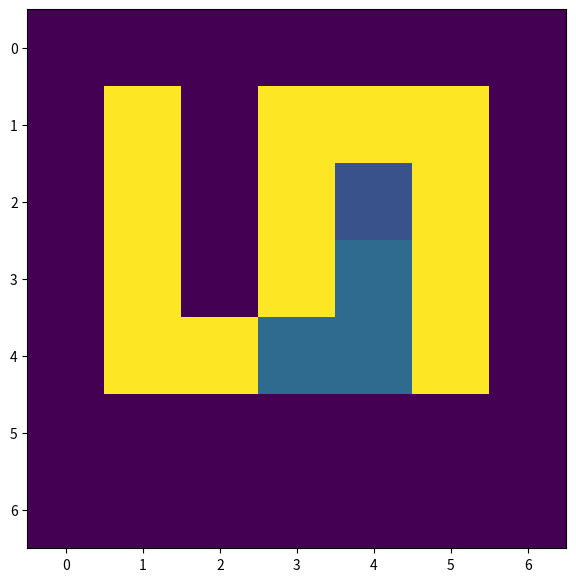




Example 2
Ending Board:
[['x' 'x' 'x' 'x' 'x' 'x' 'x']
 ['x' '-' 'x' '-' '-' '-' 'x']
 ['x' '-' 'x' 'S' 'f' '-' 'x']
 ['x' '-' 'x' 's' 's' '-' 'x']
 ['x' '-' '-' '-' '-' '-' 'x']
 ['x' 'x' 'x' 'x' 'x' 'x' 'x']
 ['x' 'x' 'x' 'x' 'x' 'x' 'x']]



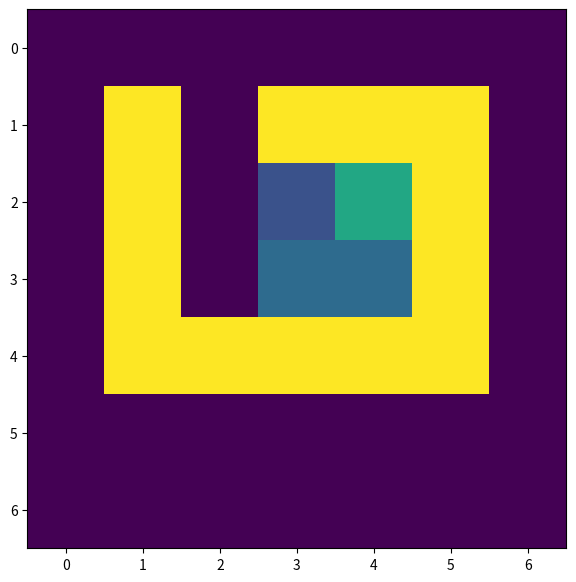




Example 3
Ending Board:
[['x' 'x' 'x' 'x' 'x' 'x' 'x']
 ['x' '-' 'x' '-' '-' '-' 'x']
 ['x' '-' 'x' 'S' 'f' '-' 'x']
 ['x' '-' 'x' 's' 's' '-' 'x']
 ['x' '-' '-' '-' '-' '-' 'x']
 ['x' 'x' 'x' 'x' 'x' 'x' 'x']
 ['x' 'x' 'x' 'x' 'x' 'x' 'x']]



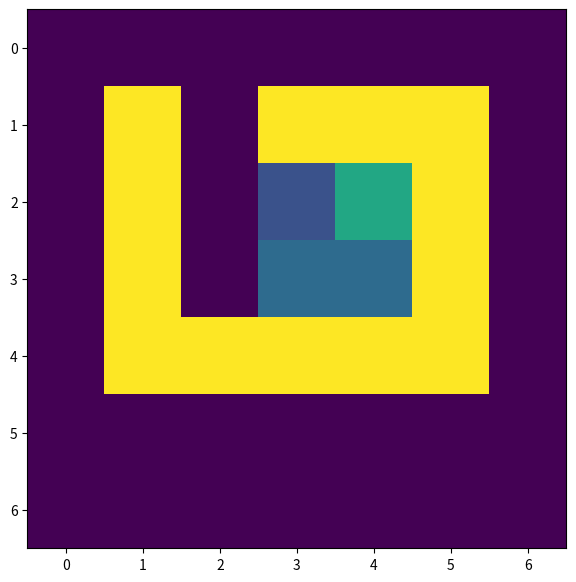




Example 4
Ending Board:
[['x' 'x' 'x' 'x' 'x' 'x' 'x']
 ['x' '-' 'x' '-' '-' '-' 'x']
 ['x' '-' 'x' '-' 'f' '-' 'x']
 ['x' '-' 'x' '-' '-' '-' 'x']
 ['x' '-' '-' 's' 's' 'S' 'x']
 ['x' 'x' 'x' 'x' 'x' 'x' 'x']
 ['x' 'x' 'x' 'x' 'x' 'x' 'x']]



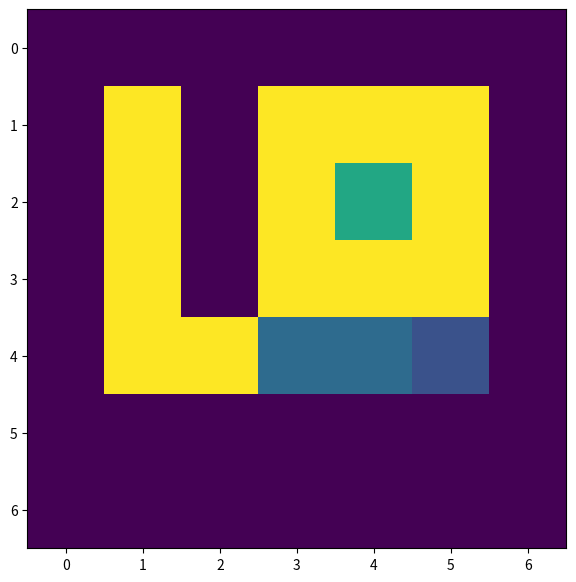




Case 1
Ending Board:
[['x' 'x' 'x' 'x' 'x' 'x' 'x']
 ['x' '-' 'x' '-' '-' '-' 'x']
 ['x' '-' 'x' '-' 'S' 's' 'x']
 ['x' '-' 'x' '-' 's' 's' 'x']
 ['x' '-' '-' '-' '-' '-' 'x']
 ['x' 'x' 'x' 'x' 'x' 'x' 'x']
 ['x' 'x' 'x' 'x' 'x' 'x' 'x']]



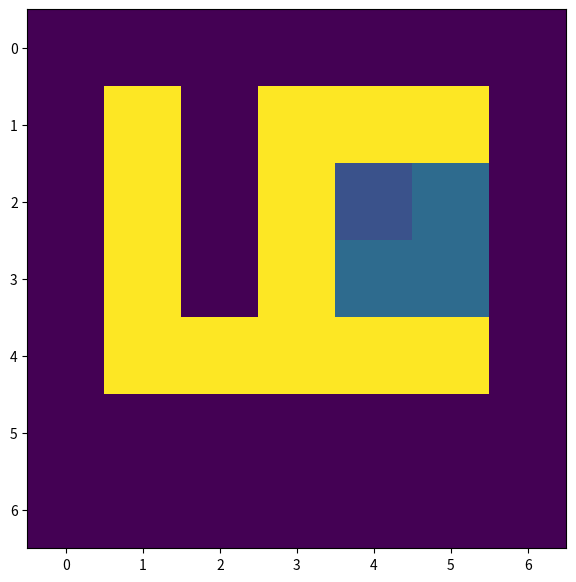




Case 2
Ending Board:
[['x' 'x' 'x' 'x' 'x' 'x' 'x']
 ['x' '-' 'x' '-' 's' 's' 'x']
 ['x' '-' 'x' '-' 'S' 's' 'x']
 ['x' '-' 'x' '-' '-' '-' 'x']
 ['x' '-' '-' '-' '-' '-' 'x']
 ['x' 'x' 'x' 'x' 'x' 'x' 'x']
 ['x' 'x' 'x' 'x' 'x' 'x' 'x']]



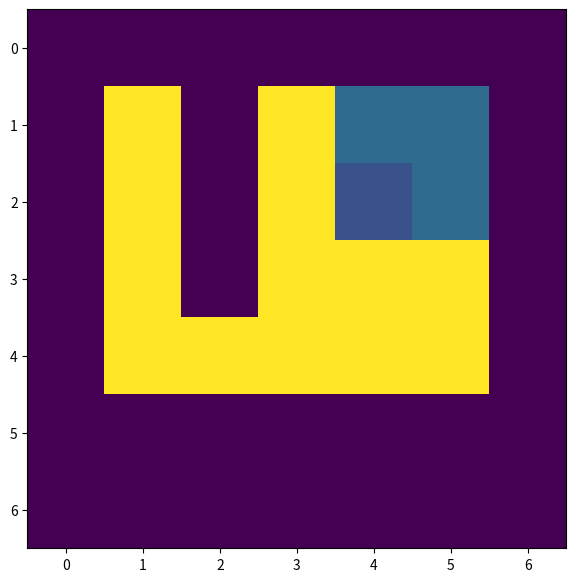




Case 3
Ending Board:
[['x' 'x' 'x' 'x' 'x' 'x' 'x']
 ['x' '-' 'x' '-' '-' '-' 'x']
 ['x' '-' 'x' '-' 'f' '-' 'x']
 ['x' '-' 'x' '-' '-' 'S' 'x']
 ['x' '-' 's' 's' 's' 's' 'x']
 ['x' 'x' 'x' 'x' 'x' 'x' 'x']
 ['x' 'x' 'x' 'x' 'x' 'x' 'x']]



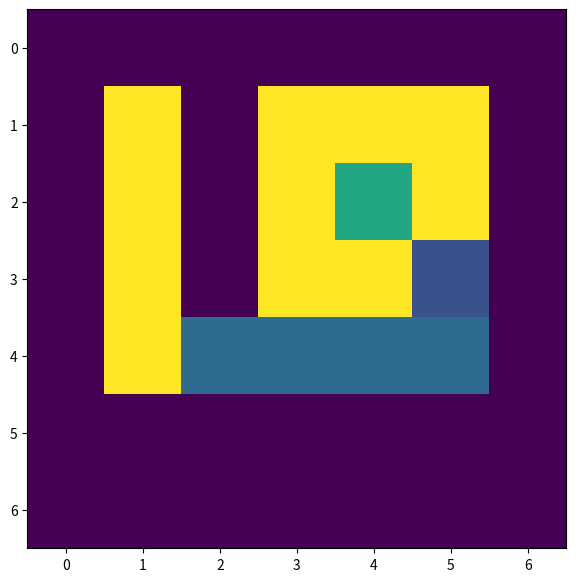




Case 4
Ending Board:
[['x' 'x' 'x' 'x' 'x' 'x' 'x']
 ['x' '-' 'x' 's' 's' '-' 'x']
 ['x' '-' 'x' 's' 'f' '-' 'x']
 ['x' '-' 'x' 's' 'S' '-' 'x']
 ['x' '-' '-' '-' '-' '-' 'x']
 ['x' 'x' 'x' 'x' 'x' 'x' 'x']
 ['x' 'x' 'x' 'x' 'x' 'x' 'x']]



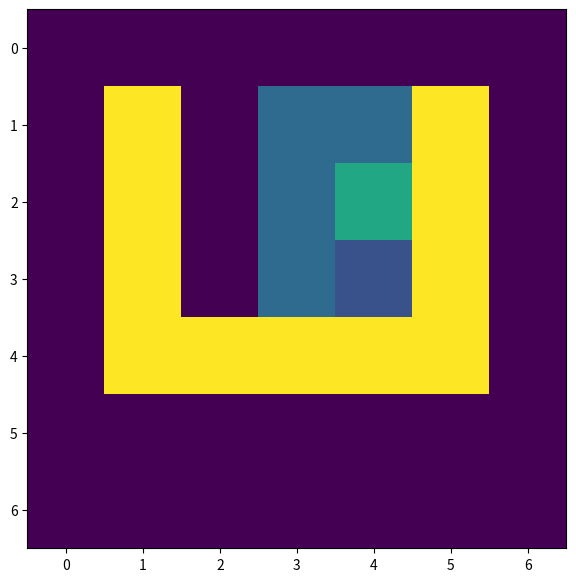




Case 5
Ending Board:
[['x' 'x' 'x' 'x' 'x' 'x' 'x' 'x']
 ['x' '-' '-' '-' '-' '-' '-' 'x']
 ['x' '-' '-' '-' '-' '-' '-' 'x']
 ['x' '-' 'S' '-' '-' '-' '-' 'x']
 ['x' '-' 's' 's' 's' 's' 's' 'x']
 ['x' 'x' 'x' 'x' 'x' 'x' 'x' 'x']]



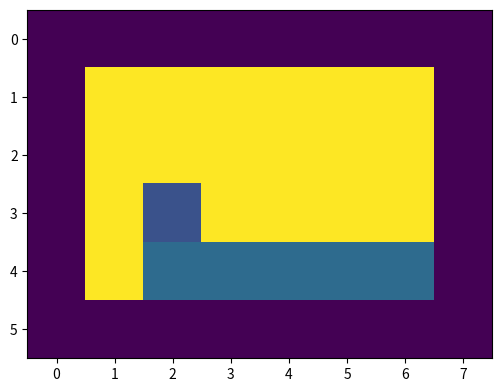

Finished Successfully


In [ ]:
# Question 5 - Snake
class BoardElements(Enum):
    Body = 's'
    Head = 'S'
    Food = 'f'
    Empty = '-'
    Obstacle = 'x'
    def get_message(self):
        return self.value


class Movements(Enum):
    Up =    ('u', (np.array(-1),np.array(0)))
    Right = ('r', (np.array(0),np.array(1)))
    Down =  ('d', (np.array(1),np.array(0)))
    Left =  ('l', (np.array(0),np.array(-1)))

def calculateSnakeMovment(board: List[List[BoardElements]], movements: List[Movements]) -> str:

    np_board = np.array(board)
    row_num, col_num  = np_board.shape
    np_board = np.c_[np.full((row_num,1),'x'), np_board, np.full((row_num,1),'x')]
    np_board = np.vstack([np.full((1,col_num+2),'x'), np_board, np.full((1,col_num+2),'x')])
    def search_snake() -> list[tuple[np.ndarray, np.ndarray]]:
        nonlocal np_board
        curr_position = np.where(np_board == BoardElements.Head.value)
        snake = [curr_position]
        continue_search = True
        while continue_search:
            continue_search = False
            for movement in Movements:
                next_position = get_next_position(curr_position, movement)
                if np_board[next_position] == BoardElements.Body.value and next_position not in snake:
                    snake.append(next_position)
                    curr_position = next_position
                    continue_search = True
                    break

        return snake

    snake = search_snake()
    curr_position = snake[0]
    map_movements_txt = {movement.value[0]: movement for movement in Movements}

    for movement in movements:
        movement = map_movements_txt[movement]
        next_position = get_next_position(curr_position, movement)
        last_element = np_board[next_position]
        if last_element in (BoardElements.Obstacle.value, BoardElements.Body.value):
            break
        else:
            np_board[next_position] = BoardElements.Head.value
            np_board[curr_position] = BoardElements.Body.value
            curr_position = next_position
            snake.insert(0, curr_position)
            if last_element == BoardElements.Empty.value:
                np_board[snake.pop()] = BoardElements.Empty.value

    print(f'Ending Board:\n{np_board}\n')
    print_board(np_board)
    return element_to_message(last_element)


def element_to_message(element) -> str:
    map_element_to_message = {
        BoardElements.Body.value: "game over",
        BoardElements.Head.value: "game over",
        BoardElements.Obstacle.value: "game over",
        BoardElements.Food.value: "food",
        BoardElements.Empty.value: "no change"
    }
    return map_element_to_message[element[0]]

def get_next_position(curr_position, movement):
    return np.add(curr_position[0], movement.value[1][0]), np.add(curr_position[1], movement.value[1][1])


def print_board(np_board):
    convert_map = { 'x': 0.0, '-' : 1.0, 'f':0.6, 's':0.35, 'S':0.25}
    np_board = np.vectorize(convert_map.get)(np_board)
    fig, axes = plt.subplots(1,1, figsize=np_board.shape)
    axes.imshow(np_board)
    plt.show()



def dev():
    print("\n\n\nExample 1")
    assert calculateSnakeMovment(board =   [
                                        ['-','x','-','-','-'],
                                        ['-','x','-','f','-'],
                                        ['-','x','-','-','-'],
                                        ['-','s','s','S','-'],
                                        ['x','x','x','x','x']
                                    ], movements = ['u','u']) == 'food'

    print("\n\n\nExample 2")
    assert calculateSnakeMovment(board =   [
                                        ['-','x','-','-','-'],
                                        ['-','x','-','f','-'],
                                        ['-','x','-','-','-'],
                                        ['-','s','s','S','-'],
                                        ['x','x','x','x','x']
                                    ], movements = ['u','l','u']) == 'no change'


    print("\n\n\nExample 3")
    assert calculateSnakeMovment(board =   [
                                        ['-','x','-','-','-'],
                                        ['-','x','-','f','-'],
                                        ['-','x','-','-','-'],
                                        ['-','s','s','S','-'],
                                        ['x','x','x','x','x']
                                    ], movements = ['u','l','u','d']) == 'game over'



    print("\n\n\nExample 4")
    assert calculateSnakeMovment(board =   [
                                        ['-','x','-','-','-'],
                                        ['-','x','-','f','-'],
                                        ['-','x','-','-','-'],
                                        ['-','s','s','S','-'],
                                        ['x','x','x','x','x']
                                    ], movements = ['r','r']) == 'game over'

dev()


def test_cases():
    print("\n\n\nCase 1")
    assert calculateSnakeMovment([
    ['-','x','-','-','-'],
    ['-','x','-','f','-'],
    ['-','x','-','-','-'],
    ['-','s','s','S','-'],
    ['x','x','x','x','x']
],
['u','r','u','l']) == 'food'


    print("\n\n\nCase 2")
    assert calculateSnakeMovment([
    ['-','x','-','-','-'],
    ['-','x','-','f','-'],
    ['-','x','-','-','-'],
    ['-','s','s','S','-'],
    ['x','x','x','x','x']
],
['u','l','u','u','r','r','d','l']) == 'food'

    print("\n\n\nCase 3")
    assert calculateSnakeMovment([
    ['-','x','-','-','-'],
    ['-','x','-','f','-'],
    ['-','x','-','-','-'],
    ['s','s','s','s','S'],
    ['x','x','x','x','x']
],
['u','r','d','l']) == 'game over'

    print("\n\n\nCase 4")
    assert calculateSnakeMovment([
    ['-','x','-','-','-'],
    ['-','x','-','f','-'],
    ['-','x','-','-','-'],
    ['s','s','s','s','S'],
    ['x','x','x','x','x']
],
['u','u','u','l','l','d','d','r']) == 'no change'

    print("\n\n\nCase 5")
    assert calculateSnakeMovment([
    ['-','-','-','-','-','-'],
    ['s','s','s','s','s','S'],
    ['-','-','-','-','-','-'],
    ['-','-','-','-','-','-']
],
['d','d','l','l','l','l','u']) == 'no change'

test_cases()
print("Finished Successfully")

# Question 5.5 - matrix transpose
20 mins

Please implement a function called matrixTranspose. The function receives a matrix of integers as input, transposes it, and returns the transpose of the matrix as output.

For example, given the matrix:

```
[
    [1,2,3],
    [4,5,6],
    [7,8,9],    
]
```

The function should return:

```
[
    [1, 4, 7],
    [2, 5, 8],
    [3, 6, 9]    
]
```



**Examples:**

```
Input:
[
    [1, 0],
    [-4, 5]
]

Output:
[
    [1, -4],
    [0, 5]
]
```

**Test Cases:**
```
1.
In:
[
    [2,7],
    [5,-3]
]
Out:
[
    [2,5],
    [7,-3]
]

2.
[
    [3,3],
    [4,4]
]
out:
[
    [3,4],
    [3,4]    
]

3.
In:
[
    [13,-2],
    [-9,5],    
    [0,34]    
]
Out:
[
    [13, -9, 0],
    [-2, 5, 34]
]

4.
In:
[
    [5, -5, 27],
    [0, -31, 11]
]
Out:
[
    [5, 0],
    [-5, -31],
    [27, 11]
]

5.
In:
[
    [1, 12, 3, 4, 15, 36, 7, 28, 9, 10],
    [100, 95, 90, 15, 80, 75, -70, 65, 60, 55],
    [-3, -6, -9, -22, -15, -18, -27, -24, -27, -39],
    [5, -36, -11, -18, 32, 49, -27, -18, -28, 44],
    [7, -47, 27, 35, 24, 32, 20, 37, -47, -27],
    [49, 4, 46, -23, 4, -45, 27, -9, 0, 36],
    [23, -18, -11, 24, 49, -33, 1, -7, -43, -47],
    [-4, 24, 21, 9, 49, -5, 1, 38, -49, -36],
    [42, -35, 46, 25, 4, 31, -10	, -17, -41, 49],
    [15, -47, -6, 20, 20, -17, -36, 9, -31, 41]
]
Out:
[
    [1, 100, -3, 5, 7, 49, 23, -4, 42, 15],
    [12, 95, -6, -36, -47, 4, -18, 24, -35, -47],
    [3, 90, -9, -11, 27, 46, -11, 21, 46, -6],
    [4, 15, -22, -18, 35, -23, 24, 9, 25, 20],
    [15, 80, -15, 32, 24, 4, 49, 49, 4, 20],
    [36, 75, -18, 49, 32, -45, -33, -5, 31, -17],
    [7, -70, -27, -27, 20, 27, 1, 1, -10, -36],
    [28, 65, -24, -18, 37, -9, -7, 38, -17, 9],
    [9, 60, -27, -28, -47, 0, -43, -49, -41, -31],
    [10, 55, -39, 44, -27, 36, -47, -36, 49, 41]
]

In [ ]:
# Question 5.5 - matrixTranspose
def matrixTranspose(input_matrix : List[List[int]]):
    output_matrix = []
    for index, line in enumerate(input_matrix):
        for jindex, value in enumerate(line):
            if index == 0:
                output_matrix.append([])
            output_matrix[jindex].append(value)
    return output_matrix

def dev():
    assert matrixTranspose([
                    [1,2,3],
                    [4,5,6],
                    [7,8,9],
                    ]) == [[1, 4, 7],[2, 5, 8],[3, 6, 9]]


    assert matrixTranspose([
    [1, 0],
    [-4, 5]
]) ==[
    [1, -4],
    [0, 5]
]

    assert matrixTranspose([
    [2,7],
    [5,-3]
]) == [
    [2,5],
    [7,-3]
]


    assert matrixTranspose(
    [
    [3,3],
    [4,4]
    ]) == [
    [3,4],
    [3,4]
    ]

    assert matrixTranspose(
        [
    [13,-2],
    [-9,5],
    [0,34]
]
    ) == [
    [13, -9, 0],
    [-2, 5, 34]
]


    assert matrixTranspose(
    [
    [5, -5, 27],
    [0, -31, 11]
]) == [
    [5, 0],
    [-5, -31],
    [27, 11]
]

    assert matrixTranspose([
    [1, 12, 3, 4, 15, 36, 7, 28, 9, 10],
    [100, 95, 90, 15, 80, 75, -70, 65, 60, 55],
    [-3, -6, -9, -22, -15, -18, -27, -24, -27, -39],
    [5, -36, -11, -18, 32, 49, -27, -18, -28, 44],
    [7, -47, 27, 35, 24, 32, 20, 37, -47, -27],
    [49, 4, 46, -23, 4, -45, 27, -9, 0, 36],
    [23, -18, -11, 24, 49, -33, 1, -7, -43, -47],
    [-4, 24, 21, 9, 49, -5, 1, 38, -49, -36],
    [42, -35, 46, 25, 4, 31, -10	, -17, -41, 49],
    [15, -47, -6, 20, 20, -17, -36, 9, -31, 41]
]) ==[
    [1, 100, -3, 5, 7, 49, 23, -4, 42, 15],
    [12, 95, -6, -36, -47, 4, -18, 24, -35, -47],
    [3, 90, -9, -11, 27, 46, -11, 21, 46, -6],
    [4, 15, -22, -18, 35, -23, 24, 9, 25, 20],
    [15, 80, -15, 32, 24, 4, 49, 49, 4, 20],
    [36, 75, -18, 49, 32, -45, -33, -5, 31, -17],
    [7, -70, -27, -27, 20, 27, 1, 1, -10, -36],
    [28, 65, -24, -18, 37, -9, -7, 38, -17, 9],
    [9, 60, -27, -28, -47, 0, -43, -49, -41, -31],
    [10, 55, -39, 44, -27, 36, -47, -36, 49, 41]
]


dev()

print("Finished Successfully")

Finished Successfully


# Question 6 - 2048
30 mins

"2048" is a sliding tile puzzle game in which a player slides tiles on a grid to form a tile with the number 2048.

When you choose a direction, the tiles will fly as far as possible until they are stopped by another tile or the grid edge.

When two tiles with the same value collide, they become one tile whose value equals the sum of the two colliding tiles.

The game can be controlled with the arrow keys - up, right, down or left.

In this question you will solve a variant of the 2048 game - you are given a matrix A of dimension NxM and cell A1 can be merged into cell A2 only if cell A1 is a factor of cell A2 (a factor is an integer that divides exactly into a whole number without a remainder. e.g, 2 is a factor of 10).

In that case, cell A2 value will be replaced by value of cell A1 x value of cell A2, and cell A1 value will be replaced by 1.


For example, if cell A1 value is 3 and cell A2 value if 6, then after merging the cells, their values will be (A1=1, A2=18) because 3 is a factor of 6.

The following operations can be done on the matrix:

* L: left swipe - merges the cells from rightmost to leftmost

* R: right swipe - merges the cells from leftmost to rightmost

* T: top swipe - merges the cells from bottom to top

* B: bottom swipe - merges the cells from top to bottom

Please implement a function which accepts a matrix A and a string S (representing the series of operations), and returns the final state of the matrix.

**Examples:**
1:
```
[
    [6,2],
    [3,1],    
]
```
S = "LT"
result - After L operation:
```
[
    [12,1],
    [3,1],
]
```
(cell 2 is merged into cell 6 as 2 is a factor of 6)
(cell 1 is merged into cell 3 as 1 is a factor of 3)


After T operation, matrix becomes:
```
[
    [36, 1],
    [1, 1]
]
```

(cell 3 is merged into cell 12 as 3 is a factor of 12)

(cell 1 is merged into cell 1 as 1 is a factor of 1)

2.
```
A =
[
    [12,5],
    [3,6],
]
S = "RB"
After R:
[
    [12,5],
    [1,18],
]
After B:
[
    [12,5],
    [1,18],
]
```
3.
```
A =
[
    [18,3,3]
    [10,2,5]
]
S = "LL"
After L:
[
    [162,1,1]
    [20,1,5]
]
After L:
[
    [162,1,1]
    [20,1,5]
]
```

**Examples:**
```
1.
[
    [12, 6],
    [3,12]
]
BR
[
    [12,1],
    [1,216]
]

2.
[
    [11,7],
    [2,12]
]
LLBT
[
    [11,7],
    [2,12]
]

3.
[
    [2, 8, 4],
    [5, 4, 15],
    [15, 2, 11],
]
RBLT
[
    [1,512,1]
    [1,1,15],
    [75,1,11]
]

4.
[
    [90879, 60034, 42784, 89969],
    [62966, 50049, 32067, 20548],
    [46633, 44184, 3528, 87740],
    [63958, 43081, 91772, 29045]
]
TRTL
[
    [90879, 60034, 42784, 89969],
    [62966, 50049, 32067, 20548],
    [46633, 44184, 3528, 87740],
    [63958, 43081, 91772, 29045]
]

5.
[
    [2, 6, 3, 12, 25, 5, 20, 6, 600],
    [1, 9, 12, 99, 456, 912, 110, 1, 10],
    [10, 5, 333, 10, 55, 11, 55, 605, 5],
    [33, 99, 11, 22, 100, 1000, 10, 5, 3]
]
RRBBLLTTLBTRBBTRLBTRLBTR
[
    [1, 12, 1, 36, 25, 1, 100, 1, 36000],
    [1, 9, 12, 99, 1, 415872, 110, 1, 1],
    [50, 1, 333, 10, 55, 1, 1, 1830125, 1],
    [1, 3267, 1, 242, 1, 5000000, 1, 1, 3]
]

In [ ]:
# Question 6 - 2048
def movement(matrix, direction):
    is_vertical, is_reverse = actions[direction]
    num_lines, num_coulmns = matrix.shape
    if is_vertical:
        range_list = list(range(1, num_coulmns))
        if is_reverse:
            range_list.reverse()
        for j in range_list:
            if is_reverse:
                src = matrix[:,j]
                tgt = matrix[:,j-1]
            else:
                src = matrix[:,j-1]
                tgt = matrix[:,j]
            if True:
                for i in range (0,num_lines):
                    if tgt[i] % src[i] == 0:
                        if is_reverse:
                            matrix[i,j-1] = src[i] * tgt[i]
                            matrix[i,j] = 1
                        else:
                            matrix[i,j] = src[i] * tgt[i]
                            matrix[i,j-1] = 1
    else:
        range_list = list(range(1, num_lines))
        if is_reverse:
            range_list.reverse()
        for i in range_list:
            if is_reverse:
                src = matrix[i,:]
                tgt = matrix[i-1,:]
            else:
                src = matrix[i-1,:]
                tgt = matrix[i,:]
            for j in range (0,num_coulmns):
                if tgt[:,j] % src[:,j] == 0:
                    if is_reverse:
                        matrix[i-1,j] = src[:,j] * tgt[:,j]
                        matrix[i,j] = 1
                    else:
                        matrix[i,j] = src[:,j] * tgt[:,j]
                        matrix[i-1,j] = 1



    return(matrix)

actions = {
            "L": (True, True),
            "R": (True, False),
            "T": (False, True),
            "B": (False, False)
          }

def game_2048(input_matrix : List[List[int]], s: str):
    np_matrix = np.matrix(input_matrix)
    for action in s:
        np_matrix  = movement(np_matrix, action)
    return(np_matrix)

def dev():
    print("dev 1")
    print(game_2048([
        [6,2],
        [3,1]
    ], "LT"))
    print("\ndev 2")
    print(game_2048([
        [12,5],
        [3,6]
    ], "RB"))
    print("\ndev 3")
    print(game_2048([
        [18,3,3],
        [10,2,5]
    ], "LL"))

dev()


def test_case():
    print("\nExample 1")
    print(game_2048([
        [12, 6],
        [3,12]
        ], "BR"))

    print("\n\nExample 2")
    print(game_2048([
       [11,7],
        [2,12]
        ], "LLBT"))

    print("\n\nExample 3")
    print(game_2048([
    [2, 8, 4],
    [5, 4, 15],
    [15, 2, 11],
        ], "RBLT"))

    print("\n\nExample 4")
    print(game_2048([
    [90879, 60034, 42784, 89969],
    [62966, 50049, 32067, 20548],
    [46633, 44184, 3528, 87740],
    [63958, 43081, 91772, 29045]
        ], "TRTL"))

    print("\n\nExample 5")
    print(game_2048([
    [2, 6, 3, 12, 25, 5, 20, 6, 600],
    [1, 9, 12, 99, 456, 912, 110, 1, 10],
    [10, 5, 333, 10, 55, 11, 55, 605, 5],
    [33, 99, 11, 22, 100, 1000, 10, 5, 3]
        ], "RRBBLLTTLBTRBBTRLBTRLBTR"))


test_case()

dev 1
[[36  1]
 [ 1  1]]

dev 2
[[12  5]
 [ 1 18]]

dev 3
[[162   1   1]
 [ 20   1   5]]

Example 1
[[ 12   1]
 [  1 216]]


Example 2
[[11  7]
 [ 2 12]]


Example 3
[[  1 512   1]
 [  1   1  15]
 [ 75   1  11]]


Example 4
[[90879 60034 42784 89969]
 [62966 50049 32067 20548]
 [46633 44184  3528 87740]
 [63958 43081 91772 29045]]


Example 5
[[      1      12       1      36      25       1     100       1   36000]
 [      1       9      12      99       1  415872     110       1       1]
 [     50       1     333      10      55       1       1 1830125       1]
 [      1    3267       1     242       1 5000000       1       1       3]]


# Question 7 - spiralPrint
30 mins

Please implement a function called spiralPrint.

The function receives a matrix of integers as input, and prints the elements in spiral order (clockwise) as output.

For example, given the matrix:

```
[
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]
```

The function should return:
[1, 2, 3, 6, 9, 8, 7, 4, 5]


**Examples:**

```
[
    [8, 1, 7, 3],
    [4, 6, 0, -2],
    [2, 7, 9, 10],
    [-1, 5, 12, -4]
]
```

[8, 1, 7, 3, -2, 10, -4, 12, 5, -1, 2, 4, 6, 0, 9, 7]

**Test cases:**

*
```
[
    [0, 1, -5, 12],
    [3, 7, 9, -2],
    [2, 17, 4, -1],
    [-11, 5, 31, -4]
]
```


0, 1, -5, 12, -2, -1, -4, 31, 5, -11, 2, 3, 7, 9, 4, 17

*
```
[
[1, 1],
[2, 2]
]
```

[1,1,2,2]

*
```
[
    [3, -7],
    [5, 0],
    [-2, 9]
]
```

[3, -7, 0, 9, -2, 5]

*
```
[
    [0, 7, 11, 6],
    [9, 5, 3, 4],
    [14, -1, -3, 1]
]
```

[0, 7, 11, 6, 4, 1, -3, -1, 14, 9, 5, 3]

*
```
[
    [-15, 2, 3, 4, 15, 6, 7, 18, 9, 1],
    [10, 95, 80, 17, 80, 75, -70, 45, 60, 55],
    [-3, -6, -9, -22, -15, -18, -29, -24, -27, 38],
    [50, -36, -11, -18, 33, 49, -27, -18, -28, 40],
    [7, -47, 27, 36, 24, 32, 10, 37, -17, -27],
    [49, 4, 36, -23, 5, -45, 27, -9, 0, 26],
    [23, -19, -11, 24, 49, -32, 1, -7, -43, -47],
    [-4, 24, 21, 0, 49, -5, 1, 38, -45, -36],
    [42, -31, 46, 25, 4, 19, -10, -17, -41, 49],
    [15, -7, -16, 20, 20, -17, -6, 9, -3, 41]
]
```
[-15, 2, 3, 4, 15,	 6, 7, 18, 9, 1, 55, 38, 40, -27, 26, -47, -36, 49, 41, -3,	 9, -6, -17, 20,	 20, -16, -7, 15, 42, -4, 23, 49, 7, 50,	 -3, 10,	 95, 80,	17,	80,	75, -70, 45,	 60,	-27,	-28, -17, 0, -43, -45, -41, -17,	 -10,	19,	4,	25,	46,	-31,	24,	-19,	4,	-47,	-36,	-6,	-9,	-22,	-15,	-18,	-29,	-24,	-18,	37,	-9,	-7,	38,	1,	-5,	49,	0,	21,	-11,	36,	27,	-11,	-18,	33,	49,	-27,	10, 27,	 1,	 -32, 49, 24, -23, 36,	24,	32, -45,	5]

In [ ]:
# Question 7 - spiralPrint
def spiralPrint(input_matrix : List[List[int]]) -> List[int]:
    output = []
    np_mat = np.matrix(input_matrix)
    obj = np_mat[0,:].tolist()
    if len(obj) > 0:
        output.extend(obj[0])
    obj = np_mat[1:,-1].T.tolist()
    if len(obj) > 0:
        output.extend(obj[0])
    obj = np.flip(np_mat[-1:, :-1]).tolist()
    if len(obj) > 0:
        output.extend(obj[0])
    obj = (np.flip(np_mat[1:-1, 0].T)).tolist()
    if len(obj) > 0:
        output.extend((obj[0]))

    new_matrix = np_mat[1:-1, 1:-1]
    if new_matrix.size > 0:
        output.extend(spiralPrint(new_matrix))

    return output

def dev():
    assert spiralPrint([
                    [1, 2, 3],
                    [4, 5, 6],
                    [7, 8, 9]
                ]) == [1, 2, 3, 6, 9, 8, 7, 4, 5]

    assert spiralPrint([
        [8, 1, 7, 3],
        [4, 6, 0, -2],
        [2, 7, 9, 10],
        [-1, 5, 12, -4]
    ]) == [8, 1, 7, 3, -2, 10, -4, 12, 5, -1, 2, 4, 6, 0, 9, 7]


dev()


def test_answer():
    assert spiralPrint([
    [0, 1, -5, 12],
    [3, 7, 9, -2],
    [2, 17, 4, -1],
    [-11, 5, 31, -4]
]) == [0, 1, -5, 12, -2, -1, -4, 31, 5, -11, 2, 3, 7, 9, 4, 17]

    assert spiralPrint([
[1, 1],
[2, 2]
]) == [1,1,2,2]


    assert spiralPrint([
    [3, -7],
    [5, 0],
    [-2, 9]
]) == [3, -7, 0, 9, -2, 5]



    assert spiralPrint([
    [-15, 2, 3, 4, 15, 6, 7, 18, 9, 1],
    [10, 95, 80, 17, 80, 75, -70, 45, 60, 55],
    [-3, -6, -9, -22, -15, -18, -29, -24, -27, 38],
    [50, -36, -11, -18, 33, 49, -27, -18, -28, 40],
    [7, -47, 27, 36, 24, 32, 10, 37, -17, -27],
    [49, 4, 36, -23, 5, -45, 27, -9, 0, 26],
    [23, -19, -11, 24, 49, -32, 1, -7, -43, -47],
    [-4, 24, 21, 0, 49, -5, 1, 38, -45, -36],
    [42, -31, 46, 25, 4, 19, -10, -17, -41, 49],
    [15, -7, -16, 20, 20, -17, -6, 9, -3, 41]
]) == [-15, 2, 3, 4, 15, 6, 7, 18, 9, 1, 55, 38, 40, -27, 26, -47, -36, 49, 41, -3, 9, -6, -17, 20, 20, -16, -7, 15, 42, -4, 23, 49, 7, 50, -3, 10, 95, 80, 17, 80, 75, -70, 45, 60, -27, -28, -17, 0, -43, -45, -41, -17, -10, 19, 4, 25, 46, -31, 24, -19, 4, -47, -36, -6, -9, -22, -15, -18, -29, -24, -18, 37, -9, -7, 38, 1, -5, 49, 0, 21, -11, 36, 27, -11, -18, 33, 49, -27, 10, 27, 1, -32, 49, 24, -23, 36, 24, 32, -45, 5]

test_answer()

print("Finished Successfully")

Finished Successfully


# Question 7.5 - WordPuzzle

30 mins
In a Word-Search Puzzle, the player receives a rectangular-shaped grid of letters (a board) and a list of target words.
The player is required to locate each target word from the list on the board.

In this question, you are asked to implement a function that receives as input a two-dimensional array of characters and a target word, and returns “true” if the target word appears in the array and “false” if it doesn’t.

For example, given the array
```
[
    ['b', 'a', 'n', 't'],
    ['c', 'f', 'r', 'g']
]
```

and the target word "ant",
the function should return "true" (because the word appears horizontally in the top row).

Note - the words must appear either horizontally or vertically (not diagonally).

All the letters of the word must appear contiguously (i.e., with no unrelated letters in between).

**Examples**

Boards:
```
[
    [G,h,c],
    [f,m,o]
]
```
Target Word: go

Output : false


**Test Cases:**

1.
```
[
    [D,h,l,p],
    [n,v,o,f],
    [g,c,v,e],
    [b,b,e,s]
]
```
Word: Love, True

2.
```
[
    [C,i,h,k],
    [m,o,l,e]
]
```
Word: Cold, False

3.
```
[
    [F,k,m,p,r,a,y],
    [t,c,e,p,s,e,r]
]
```
Word: Respect, True

4.
```
[
    [E,j],
    [m,t],
    [g,l]
]
```
Word: Me, True

5.
```
[
    [W,f,a,g,r],
    [v,x,i,s,n]
]
```
word: Far, False

6.
```
[
    [P,e,a,c,r,e,g,x,z,o,t,i,p,k,e,a,m,b],
    [e,l,l,v,a,w,h,r,t,q,o,c,e,e,j,d,f,r],
    [a,d,s,k,h,r,m,m,e,i,w,z,s,e,c,a,e,t],
    [e,y,d,r,o,n,e,s,x,i,p,e,a,m,e,n,v,f],
    [c,o,l,d,p,e,a,c,c,e,k,g,w,i,a,n,m,o]
]
```
Word: peace, False



----------------
What would you change in your code if the function also had to return "true" for target words that appear diagonally? Please explain (in no more than 1 minute):

In [ ]:
# Question 7.5 - WordPuzzle
def WordSearchPuzzle(input_puzzle: List[List[chr]], search_word: str) -> bool:
    np_puz = np.matrix(input_puzzle)
    row_nums, col_nums  = np_puz.shape

    for i in range(row_nums):
        if search_word_in_list(np_puz[i, :].tolist()[0], search_word):
            return True
        if search_word_in_list(np.flip(np_puz[i, :]).tolist()[0], search_word):
            return True

    for j in range(col_nums):
        if search_word_in_list(np_puz[:, j].T.tolist()[0], search_word):
            return True
        if search_word_in_list(np.flip(np_puz[:, j].T).tolist()[0], search_word):
            return True
    return False



def search_word_in_list( input_list: List[chr], search_word: str) -> bool:
    return ''.join(input_list).find(search_word) >= 0

def dev():
    assert WordSearchPuzzle([
                        ['b', 'a', 'n', 't'],
                        ['c', 'f', 'r', 'g']
                    ], 'ant') == True

    assert WordSearchPuzzle([
    ['G','h','c'],
    ['f','m','o']
], 'go') == False

dev()

def test_case():
    assert WordSearchPuzzle([
                                ['D','h','l','p'],
                                ['n','v','o','f'],
                                ['g','c','v','e'],
                                ['b','b','e','s']
                            ], 'love') == True

    assert WordSearchPuzzle([
                            ['F','k','m','p','r','a','y'],
                            ['t','c','e','p','s','e','r']
                            ], 'respect') == True

    assert WordSearchPuzzle([
    ['e','j'],
    ['m','t'],
    ['g','l']
], 'me') == True

    assert WordSearchPuzzle(
    [
        ['p','e','a','c','r','e','g','x','z','o','t','i','p','k','e','a','m','b'],
        ['e','l','l','v','a','w','h','r','t','q','o','c','e','e','j','d','f','r'],
        ['a','d','s','k','h','r','m','m','e','i','w','z','s','e','c','a','e','t'],
        ['e','y','d','r','o','n','e','s','x','i','p','e','a','m','e','n','v','f'],
        ['c','o','l','d','p','e','a','c','c','e','k','g','w','i','a','n','m','o']
    ], 'peace') == False


test_case()

print("Finished Successfully")


Finished Successfully


# Question 8: - DogMovement
40 mins

A dog has spotted a bone on the street located a few meters from it. It is known that every dog can only move in steps that have a predetermined length (in meters).

Write a function that gets:
* distance - the distance between the dog and the bone in meters
* possibleSteps - the length of the steps that the dog can take

The function should return the <u>number of different paths</u> for the dog to get to the bone.

For example, if the bone is located 4 meters from the dog and the possible steps are of length [1, 2], there are exactly 5 paths:

* 1 -> 1 -> 1 -> 1
* 1 -> 1 -> 2
* 1 -> 2 -> 1
* 2 -> 1 -> 1
* 2 -> 2

Note: The dog starts at the 0th meter, and the number of paths to get from the 0th meter to the 0th meter is 1 (the only option is to stay in place).

**Examples:**
* Distance: 3. steps: [1] -> 1
* distance 6. steps: [1,4,5] -> 6
* Distance 1. steps [2,3] -> 0

**Test Case**
* 10, [1] -> 1
* 6, [1,3] -> 30
* 9, [1,3,5] -> 30
* 30, [3,9] -> 28
* 80, [4,20] -> 140
* 10, [1,2,3,4] -> 401
* 16, [2,3,4,6,8,14] -> 295
* 100, [3,7,27,41,66,70] -> 772393
* 500, [21,23,31,57] -> 801848800
* 40, [41,42,43,44] -> 0

In [ ]:
# Question 8 -  Dog Movement
def calcNumberOfPossiblePaths(distance:int, possibleSteps:List[int]) -> int:
    for step in possibleSteps:
        if distance == 0:
            return 1

        if distance < 0:
            return 0

        curr_stage_sum = 0
        for step in possibleSteps:
            if distance >= step:
                curr_stage_sum += calcNumberOfPossiblePaths(distance-step, possibleSteps)

        return curr_stage_sum

def dev():
    assert calcNumberOfPossiblePaths(4, [1,2]) == 5
    assert calcNumberOfPossiblePaths(6, [1,4,5]) == 6
    assert calcNumberOfPossiblePaths(1, [2,3]) == 0

dev()


def test_case():
    assert calcNumberOfPossiblePaths(10, [1]) == 1
    assert calcNumberOfPossiblePaths(9, [1,3, 5]) == 30
    assert calcNumberOfPossiblePaths(30, [3,9]) == 28
    assert calcNumberOfPossiblePaths(80, [4,20]) == 140
    assert calcNumberOfPossiblePaths(10, [1,2,3, 4]) == 401
    assert calcNumberOfPossiblePaths(16, [2,3,4,6,8,14]) == 295
    start = time.time()
    assert calcNumberOfPossiblePaths(100, [3,7,27,41,66,70]) == 772393
    end = time.time()
    print(f"calcNumberOfPossiblePaths 100 took {end-start} seconds")
    assert calcNumberOfPossiblePaths(40, [41,42,43,44]) == 0

test_case()

print("Finished Successfully")


calcNumberOfPossiblePaths 100 took 2.5069282054901123 seconds
Finished Successfully


# Question 9 - possibleSum
20 mins

Given an array of N integers, a “possible sum” is defined as the sum of X integers from the array, where 1 ≤ X ≤ N.

Your task is to implement a function that receives an array of integers as input, and returns the most frequent “possible sum”.


For example, given the array [1, 2, 3], the sum of 1,2 and the sum 3 alone both equal 3, making it the most frequent “possible sum”. The function should return 3.


You can assume that each given array has only one answer.

**Example:**

A: 1,2,3… output 3

3,5,3,5 … 8

-6, 6 …. -6

**Test Cases:**

1,1… 1

13,-5,8 …. 8

0, 132 …. 132

-12,-12,-12,-12,-12 …. -24

9223,739,9962,2781,7181 …. 9962

539,539,539,539,539,844 …. 1078

9 …. 9

In [ ]:
# Question 9 - possibleSum
def possible_sum(input_array: List[int]) -> int:
    count_sum = {}
    for i in range(1, len(input_array)+1):
        for curr_list in list(itertools.combinations(input_array, i)):
            curr_sum = sum(curr_list)
            if curr_sum in count_sum:
                count_sum[sum(curr_list)] += 1
            else:
                count_sum[sum(curr_list)] = 1

    max_sum = max(count_sum, key=count_sum.get)
    return(max_sum)


def dev():
    assert possible_sum([1, 2, 3]) == 3
    assert possible_sum([3, 5, 3, 5]) == 8
    assert possible_sum([-6, 6]) == -6

def test_answer():
    assert possible_sum([1, 1]) == 1
    assert possible_sum([13,-5,8]) == 8
    assert possible_sum([0,132]) == 132
    assert possible_sum([-12,-12,-12,-12,-12]) == -24
    assert possible_sum([9223,739,9962,2781,7181]) == 9962
    assert possible_sum([539,539,539,539,539,844]) == 1078
    assert possible_sum([9]) == 9

dev()
test_answer()
print("All Done")

All Done


# Question 10 - contiguous sum
(30 mins)

Given an array of N integers, a "contiguous sum" is defined as the sum of X contiguous integers from the array, where 1 ≤ X ≤ N.

Your task is to implement a function that receives an array of integers as input, and returns the largest "contiguous sum" in the array.

For example, given the array

[5, -2, 3, 6, -1, 2, -6]

the function should return 13, because the largest "contiguous sum" is:

5+(-2)+3+6+(-1)+2=13.


**Examples:**

A: 5,-1,-7 output:…. 5

7,0,9,-2,5,-8 …. 19

**Tests:**

3,1,-7,5 …. 5

2, -5, 1,1,1 …. 3

6,0,-6,19 …. 19

45,-45,2,9,-5,12,0,9,-20,156,-120,13,100,-60,46,12,-4,-91,-123,0,13,66,17 … 163

0,0,0,0,0,0,0,0,0,0,0,0,0 …. 0

1,1,5,17,22,1,1 …. 48

-8,-2,-9,-13,-7,-4 …. -2

--------------
What would you change in your code if instead of the largest contiguous sum, the function had to return the smallest contiguous sum? Please explain (in no more than 1 minute).

In [ ]:
# Question 10 - contiguous_sum
def contiguous_sum(input_array: List[int])-> int:
    largest_sum_list = []
    largest_sum = float('-inf')
    for i in range(0,len(input_array)):
        for j in range(0,len(input_array) -i):
            if j == 0:
                curr_sum = sum(input_array[i:])
                curr_list = input_array[i:]
            else:
                curr_sum =sum(input_array[i:-j])
                curr_list = input_array[i:-j]

            if curr_sum > largest_sum:
                largest_sum = curr_sum
                largest_sum_list = curr_list

    return(largest_sum)



def dev():
    assert contiguous_sum([5, -2, 3, 6, -1, 2, -6]) == 13
    assert contiguous_sum([5, -1, -7]) == 5
    assert contiguous_sum([7,0,9,-2,5,-8]) == 19

dev()

def test_answer():
    assert contiguous_sum([3,1,-7,5]) == 5
    assert contiguous_sum([2, -5, 1,1,1]) == 3
    assert contiguous_sum([6,0,-6,19]) == 19
    assert contiguous_sum([45,-45,2,9,-5,12,0,9,-20,156,-120,13,100,-60,46,12,-4,-91,-123,0,13,66,17]) == 163
    assert contiguous_sum([0,0,0,0,0,0,0,0,0,0,0,0,0]) == 0
    assert contiguous_sum([1,1,5,17,22,1,1]) == 48
    assert contiguous_sum([-8,-2,-9,-13,-7,-4]) == -2

test_answer()
print("Finished Successfully")

Finished Successfully


# Question 11: closesetRepeatedElements

20 mins

Please implement a function that receives an array of strings as an input and locates the two repeated elements that appear closest to each other.

The function should return the index of the first of these two elements.

If there are no repeated elements, the function should return -1.

For example, given the array
```
["blue", "yellow", "yellow", "blue", "gold"],
```
the repeated elements that appear closest to each other are "yellow" in index 1 and "yellow" in index 2 (note that "blue" also repeats, however the "yellow" instances appear closer together in the array). Therefore, the function should return 1, because that is the index of the first appearance of "yellow".

Note: You can assume that there is only one correct answer for each array.
Examples:

```
['apple', 'orange', 'banana', 'orange', 'apple']
```

Out: 1
```
['cat', 'dog', 'cat', 'mouse']
0
```
```
['table', 'chair']
-1
```


Tests:
```
1.
['mother',' father',' father'] -> 1
2.
['red',' green',' purple',' black',' white'] -> -1
3.
['apple',' strawberry',' banana',' lemon',' apple',' kiwi',' strawberry'] -> 0
4.
['fork',' pen',' bottle',' pen',' book',' book'] -> 4
5.
['dog',' duck',' cat',' duck',' elephant',' frog',' dog',' dog'] -> 6
```
----------

2.
What would you change in your code if the function had to locate the repeated entries that were furthest away from each other (instead of closest together)? Please explain (in no more than 1 minute):

In [ ]:
# Question 11: closesetRepeatedElements
def closesetRepeatedElements(input_array : List[str]) -> int:
    closest_distance = float('inf')
    found = False
    for index, search_str in enumerate(input_array):
        try:
            curr_distance = input_array[index+1:].index(search_str)
            if closest_distance > curr_distance:
                closest_distance = curr_distance
                closeset_position = index
                found = True
        except ValueError:
            pass
    if found:
        return closeset_position
    else:
        return -1

def dev():
    assert closesetRepeatedElements(['blue', 'yellow', 'yellow', 'blue', 'gold']) == 1
    assert closesetRepeatedElements(['apple', 'orange', 'banana', 'orange', 'apple'] ) == 1
    assert closesetRepeatedElements(['cat', 'dog', 'cat', 'mouse']) == 0
    assert closesetRepeatedElements(['table', 'chair']) == -1


dev()

def test_case():
   assert closesetRepeatedElements(['mother','father','father']) == 1
   assert closesetRepeatedElements(['red','green','purple','black','white']) == -1
   assert closesetRepeatedElements(['apple',' strawberry','banana','lemon','apple','kiwi','strawberry']) == 0
   assert closesetRepeatedElements(['fork','pen','bottle','pen','book','book']) == 4
   assert closesetRepeatedElements(['dog','duck','cat','duck','elephant','frog','dog','dog']) == 6


test_case()
print("Finished Successfully")

Finished Successfully


# Question 12: find_largest_nth
30 mins

Given an array of positive integers, return the (n)3rd largest number.
If no such number exists, return -1.


Examples:

[1, 2, 3, 4, 5] -> 3

[3,2,1] -> 1

[1,10] -> -1


In [ ]:
# Question 12: find_largest_nth
def find_largest_nth(input_array:List[int], nth: int) -> int:
    input_array.sort(reverse=True)
    if len(input_array) >= nth:
        return input_array[nth-1]
    else:
        return -1

def dev():
    assert find_largest_nth([1, 2, 3, 4, 5], 3) == 3
    assert find_largest_nth([3,2,1], 3) == 1
    assert find_largest_nth([1,10], 3) == -1
    assert find_largest_nth([9,9,9,9,9,9,9,9,9,9,9,9,9,9,9], 3) == 9
    assert find_largest_nth([1, 10, 234, 0, 12, 112, 20, 10, 3, 11, 0 ], 3) == 20


dev()

print("Finished Successfully")

Finished Successfully


# Question 13 - Analog Clock
50 mins

Given time in a 24-hour format, find the acute angle (in degrees) between the hour hand and the minute hand if the same time is represented on a wall clock.

**Examples:**

1.  Input: "09:00" -> 90
2. 13:17 -> 63.5

**Test Case**

* 18:18 -> 81
* 23:59 -> 5.5
* 01:30 -> 135
* 19:48 -> 54
* 03:45 -> 157.5

In [ ]:
# Question 13 - Analog Clock
def define_degree_func(units_in_clock : int)->float:
    return lambda unit: 360 * unit/units_in_clock


def findClockAcuteAngle(time: str) -> float:
    minuts_degrees = define_degree_func(60)
    hours_degrees = define_degree_func(12)

    acute_angle = 0
    hour , minute = map(lambda x : int(x), time.split(":"))
    if hour > 12:
        hour = hour - 12
    hour += minute/60
    hours_degree = hours_degrees(hour)
    minute_degree = minuts_degrees(minute)

    return round(min(abs(hours_degree - minute_degree), 360-max(hours_degree, minute_degree)+ min(hours_degree, minute_degree)),2)
def dev():
    assert findClockAcuteAngle("09:00") == 90.0
    assert findClockAcuteAngle("13:17") == 63.5

dev()


def test_case():
    assert findClockAcuteAngle("18:18") == 81.0
    assert findClockAcuteAngle("23:59") == 5.5
    assert findClockAcuteAngle("01:30") == 135.0
    assert findClockAcuteAngle("19:48") == 54.0
    assert findClockAcuteAngle("03:45") == 157.5


test_case()

print("Finished Successfully")

Finished Successfully


In [ ]:
# Question 14 smallest section to reorder

def find_reordering_section(input_array:List[int]):
    real_position = 0
    result = [-1,-1]
    def frs_internal(input_array:List[int]):
        nonlocal real_position
        if len(input_array) == 0:
            return
        largestPositionSmallerItem = max([index if value< input_array[0] else -1 for index, value in enumerate(input_array)])
        if (largestPositionSmallerItem > -1):
            if result[0] == -1:
                result[0] = real_position
            if result[1] < real_position + largestPositionSmallerItem:
                result[1] = real_position + largestPositionSmallerItem

        real_position += 1
        frs_internal(input_array[1:])
    frs_internal(input_array)
    return result
def dev():
    assert find_reordering_section([1, 3, 7, 9, 14, 16, 5, 17, 19]) == [2,6]

    assert find_reordering_section([-7,-18,-3,0,5]) == [0,1]

    assert find_reordering_section([-13,21,-10,-5]) == [1,3]

    assert find_reordering_section([1,2,3]) == [-1,-1]

dev()

def test_case():
    assert find_reordering_section([9,11,15,20,22,21,23] ) == [4,5]

    assert find_reordering_section([-37,-32,-29,-26,-22,-19,-20,-16]) == [5,6]

    assert find_reordering_section([1,1,1,-6,2,3]) == [0,3]

    assert find_reordering_section([-10000,-9500,2,3,4,5,6,0,8,7,9,-10,1,-9,1,3,10,9,11,45,0,1,12,123,6,-5,-45,-8,-9,1,-123,4,5,0,123,-41,-7,-8,-4,-99,-8854,12,1234,5678,10000]) == [2,41]

    assert find_reordering_section([2,7,9,3,12,15,14,18,19]) == [1,6]

    assert find_reordering_section([0,2,17,28,-13]) == [0,4]

    assert find_reordering_section([1,2,3,4,5,6]) == [-1,-1]

test_case()

print("Finished Successfully")

Finished Successfully


# Question 15 - accounting

30 mins

**Part 1**
<br>
<u>The Scenario</u>

You were requested by the VP R&D to develop the ability to calculate the daily P&L (Profit and Loss) of a trading strategy.
By the end of each trading day, you will get a list of all of the trades, and you are required to return the Net P&L (explained below).

<br>
<u>How do you calculate Net P&L?</u>

To calculate the Net P&L, you should first calculate the P&L of the trades, and then deduct the trading fees.

<br>
<u>Calculating the P&L of the trades </u>

If you buy 4 shares of a stock at the price of \$10 per share and sell them at \$12 per share, you made \$2 per share, which results in an \$8 profit (since you bought and sold 4 shares).

<br>
<u>Calculating trading fees:</u>

There are two types of trades, Make and Take, and each has a different fee. Note - you don't need to know what make and take trades mean. It's enough for you to know to apply different rates based on the trade type.
* Make - in this question, the fee for a make trade is 0.1% of the transaction volume (transaction volume = trade price X trade quantity).
* Take - in this question the fee for a take trade is 0.5% of the transaction volume.
    
Please Note:
Each transaction is independent when it comes to trade types and their fees, meaning that buying a stock with make doesn’t say anything about how you will close the position. It can still be either make or take.

<br>
Applying fees to the above example:

Suppose you bought the stock with a <u>make</u> trade and sold it with a <u>take</u> trade.
* Buy - bought 4 shares at \$10, so the transaction volume is 4 * \$10 = \$40.
<br>It was a make trade, and therefore the fee is 0.1% x \$40 = \$0.04.
* Sell - sold 4 shares at \$12, so the transaction volume is \$48.<br>It was a take trade, and therefore the fee is 0.5% x \$48 = \$0.24.<br>
The trading fees are \$0.28 (\$0.04 + \$0.24).<br>
The Net P&L is therefore \$8 (trades P&L) - \$0.28 (trading fees) = \$7.72.

----------------
**Part 2**

The broker returns the trade data in the following structure - a list of strings, where each string represents a single trade.
The string format is ``"trade_stock;trade_price;trade_qty;side;trade_type"``

For example:
```
[
    "GOOG;2,723.68;42;buy;make",
    "GOOG;2,792.19;42;sell;take"
]
```
means that:<br>
1. First trade was - bought 42 shares of GOOG stock at the price of \$2,723.68 (make fees)
2. Second trade was - sold 42 shares of GOOG stock at the price of \$2,792.19 (take fees)

Note the different trade_types (make and take) in the two trades, and don't forget to apply the different fees.

Implement the function **calculate_pnl** which gets the broker trades parameter (as a list of strings as specified above), and calculates the P&L (including fees). Round your result to 2 decimal places.

For example, continuing the above example with the two GOOG trades, the profit of the trades before fees is  \$2,880.78 and after applying the fees, the P&L is \$2,180.03 (rounded to 2 decimal places).

* MAKE fees: 0.1%
* TAKE fees: 0.5%

**Examples:**
```
1.
[
    "GOOG;2723.68;42;buy;make",
    "GOOG;2792.19;42;sell;take"
]
Out: 2176.67

2.
[
"AMZN;3321.74;12;buy;make",
"AMZN;3315.13;8;buy;take",
"AMZN;3407.05;20;sell;make"
]
Out: 1518.47
```
<br>

**Test case:**
```
1.
[
    "MSFT;280.4;5;buy;make",
    "MSFT;280.7;5;buy;take",
    "MSFT;290.4;5;sell;make",
    "MSFT;290.7;5;sell;take"
]
-> 82.86

2.
[
    "F;19.6;10;buy;make",
    "F;25.7;5;buy;make",
    "F;24.3;17;buy;take",
    "F;30.4;24;sell;make",
    "F;32.2;7;buy;take",
    "F;27.6;15;sell;take"
]
-> 174.28

3.
[
    "TSLA;740.7;10;sell;make",
    "TSLA;750.8;10;buy;make",
    "TSLA;760.7;7;sell;take",
    "TSLA;751.5;7;buy;make",
    "TSLA;774.6;5;buy;take",
    "TSLA;729.7;5;sell;take"
]
-> -345.51

```

In [ ]:
# Question 15 - accounting
FEES = {
        "make": 0.001,
        "take": 0.005
    }

ACTIONS = {
        "buy": -1,
        "sell": 1
    }

def calculate_pnl(trade_parameters: List[str]):
    trades_income = 0
    fees = 0
    for trade_parameter in trade_parameters:
        stock, price, amount, action, tradeType = trade_parameter.split(";")
        trade_money = float(price.replace(",","")) * int(amount)
        fees += FEES[tradeType] * trade_money
        trades_income += (ACTIONS[action] * trade_money)

    return round(trades_income-fees,2)


def dev():
    assert calculate_pnl([
                    "GOOG;2,723.68;42;buy;make",
                    "GOOG;2,792.19;42;sell;take"
                    ]) == 2176.67

    assert calculate_pnl([
                    "AMZN;3321.74;12;buy;make",
                    "AMZN;3315.13;8;buy;take",
                    "AMZN;3407.05;20;sell;make"
                    ]) == 1518.47

dev()


def test_case():
    assert calculate_pnl([
    "MSFT;280.4;5;buy;make",
    "MSFT;280.7;5;buy;take",
    "MSFT;290.4;5;sell;make",
    "MSFT;290.7;5;sell;take"
]) == 82.86


    assert calculate_pnl([
    "F;19.6;10;buy;make",
    "F;25.7;5;buy;make",
    "F;24.3;17;buy;take",
    "F;30.4;24;sell;make",
    "F;32.2;7;buy;take",
    "F;27.6;15;sell;take"
]) == 174.28

    assert calculate_pnl([
    "TSLA;740.7;10;sell;make",
    "TSLA;750.8;10;buy;make",
    "TSLA;760.7;7;sell;take",
    "TSLA;751.5;7;buy;make",
    "TSLA;774.6;5;buy;take",
    "TSLA;729.7;5;sell;take"
]) == -345.51

test_case()

print("Finished Successfully")


Finished Successfully


# Question 16 - findMissing
20 mins

Your task is to implement a function that receives as input two strings, string1 and string2, and returns the character that exists in dstring1 but is missing from string2.

For example, given string1=”chair” and string2=”chai”, the function should return “r”.

Note:
* You can assume that there is exactly one character missing.
* If a character appears more than once in string1, it is considered missing even if it appears in string 2 - as long as it appears less times. For example, if string1 is "rubber" and string 2 is "ruber", then the character "b" is missing because it appears twice in string1 but only once in string 2.

**Examples:**

* Computer, coputer -> M
* return , return -> r

In [ ]:
# Question 17 - Triple Fibonaci
def series():
  first = 0
  second = 1
  third = 1
  def _series():
    nonlocal first, second, third
    out = first + second + third
    first = second
    second = third
    third = out
    return out
  return _series


def getItem(n):
    if n == 0:
        return 0
    if n == 1:
        return 1
    if n == 2:
        return 1
    seriesMaker = series()
    for _ in range(3,n+1):
      out = seriesMaker()
    return out

def dev():
    assert getItem(0) == 0
    assert getItem(1) == 1
    assert getItem(5) == 7


def test_case():
    assert getItem(17) == 10609
##    assert getItem(80) == 499562128250022400000
    assert getItem(0) == 0
    assert getItem(2) == 1
    assert getItem(3) == 2

test_case()

print("Finished Successfully")


Finished Successfully


# Question 14 smallest section to reorder
30 mins

Please implement a function that receives as input an array of integers, and locates the smallest section of the array that needs to be re-sorted in order for the entire array to be sorted from smallest to largest. The function should return the first and last indices of the section that needs to be re-sorted.

For example, given the array
```[1, 3, 7, 9, 14, 16, 5, 17, 19]``` the function should return ```[2, 6]``` because the smallest section that needs to be re-sorted begins with the integer 7 and ends with the integer 5.

Note: If the input array is already sorted from smallest to largest, the function should return [-1, -1].

**Examples:**
```
1.
in:
[-7,-18,-3,0,5]
out:
[0,1]

2.
[-13,21,-10,-5]
out: [1,3]

3.
[1,2,3]
[-1,-1]
```

**Test Cases:**
```

1. [9,11,15,20,22,21,23] -> [4,5]

2. [-37,-32,-29,-26,-22,-19,-20,-16] -> [5,6]

3. [1,1,1,-6,2,3] -> [0,3]

4. [-10000,-9500,2,3,4,5,6,0,8,7,9,-10,1,-9,1,3,10,9,11,45,0,1,12,123,6,-5,-45,-8,-9,1,-123,4,5,0,123,-41,-7,-8,-4,-99,-8854,12,1234,5678,10000] -> 2,41

5. [2,7,9,3,12,15,14,18,19] -> 1,6

6. [0,2,17,28,-13] -> [0,4]

7. [1,2,3,4,5,6] -> [-1,-1]


In [ ]:
# Question 16 - findMissing
def findMissing(str1 : str, str2 : str) -> chr:
    freq1 = create_frequence(str1)
    freq2 = create_frequence(str2)
    for key, value in freq1.items():
        if value > freq2.setdefault(key, 0):
            return key

    return


def create_frequence(input_str : str) -> {}:
    count_dict = {}
    for char in list(input_str):
        count_dict[char] = count_dict.setdefault(char, 0) + 1
    return count_dict

def dev():
    assert findMissing("chair", "chai") == 'r'
    assert findMissing("Computer", "Coputer") == 'm'


dev()
print("Finished Successfully")

Finished Successfully


# Question 17 - Triple Fibonaci

Copy and paste the following code in the code editor, and implement the TODO comments under the "series" & "getItem" functions.

Remider the series definition is:
f(n) = f(n-1)+f(n-2)+f(n-3)

first items:
* f(0)=0
* f(1)=1
* f(2)=1

```
def series():
  # TODO: Init variables.
  first = ...
  second = ...
  third = ...
  def _series():
    # TODO: Write code here.  
  return _series


return the Nth item of the series
 0, 1, 1, 2 ...
 e.g. getItem(0) -> 0
 getItem(3) -> 2
def getItem(n):
    seriesMaker = series()
    # TODO: Write code here.
    for ...:
      seriesMaker()
    return # TODO: what is the return code?



```
**Examples:**

* 0 -> 0
* 1 -> 1
* 5 -> 7


**Test Cases**
* 17 -> 10609
* 80 -> 499562128250022400000
* 0 -> 0
* 2 -> 1
* 3 -> 2

**Async example**

In [ ]:
# Async Example
async def count():
    print("One")
    await asyncio.sleep(5)
    print("Two")

async def main():
    await asyncio.gather(count(), count(), count())

s = time.perf_counter()
await main()
elapsed = time.perf_counter() - s
print(f"main executed in {elapsed:0.2f} seconds.")



# Question 18 - Bugs in code

The following questions contain answers with bugs. Please fix the bugs and make sure all the functions return the correct values (you can run the code multiple times before submitting).

Try to solve as much questions as you can given the task time.

**1 - Coding Bug - Is Prime**<br>
The function primes_sum gets a number n and returns the sum of all the primes from 2 to n.

Please find the bug in the implementation and fix it. The code needs to run and return a correct solution for all the examples.

Examples:
```
Input: 10
Output: 17

Input: 17
Output: 41
```
<br>Code:
```
def _is_prime(num):
	if i % 2 == 0:
		return num == 2
	curr = 3
	while curr * curr < num:
		if num % curr == 0:
			return True
		curr += 2
	return False

def primes_sum(n):
	result = 0
	for i in range(2, n):
		if _is_prime(i):
			result += 1
	return result
```

<br>

**2 - Coding Bug - nodes in tree**<br>
The function count_nodes_in_tree gets a Node object root that represent a binary tree and returns the number of nodes in the tree.

Please find the bug in the implementation and fix it. The code needs to run and return a correct solution for all the examples.

Examples:
```
Input: A root of a tree with 7 nodes
Output: 7
Input: A root of a tree with 3 nodes
Output: 3
```

Code:
```
class Node():

	def __init__(self, data, right=None, left=None):
		self.data = data
		self.right = right
		self.left = left

	def is_leaf(self):
		return true


def count_nodes_in_tree(root):
	if root.is_leaf():
		return 1
	count = 0
	if root.right:
		count += count_nodes_in_tree(root.right)
	if root.left:
		count += 1
	return count
```
<br>

**3 - Coding Bug -  fib**<br>
The function fib gets a number n and returns the nth number in the fibonacci series.
The fibonacci series: 1, 1, 2, 3, 5, 8, 13...
The first and second numbers are 1. The 6th number is 8.

Please find the bug in the implementation and fix it. The code needs to run and return a correct solution for all the examples.

Examples:
```
Input: 2
Output: 1
Input: 6
Output: 8
Input: 10
Output: 55
```

Code:
```
def fib(n):
	prev = 1
	curr = 2
	for _ in range(n):
		prev = curr
		curr = prev + curr
	return curr
```

In [ ]:
# Question 18 - 1
def _is_prime(num):
    if num % 2 == 0:
        return num == 2
    curr = 3
    while curr * curr <= num:
        if num % curr == 0:
            return False
        curr += 2

    return True

def primes_sum(n):
    result = 0
    for i in range(2, n+1):
        if _is_prime(i):
            result += i
    return result

ppprint(primes_sum(10))

17


In [ ]:
# Question 18 - 2
class Node():
	def __init__(self, data, right=None, left=None):
		self.data = data
		self.right = right
		self.left = left

	def is_leaf(self):
		return self.right is None and self.left is None


def count_nodes_in_tree(root):
	if root.is_leaf():
		return 1
	count = 0
	if root.right:
		count += count_nodes_in_tree(root.right)
	if root.left:
		count += count_nodes_in_tree(root.left)
	return count

NODE = Node(data = 'NODE', right = None, left = None) # node
AAA = Node(data = 'AAA', right = NODE, left = NODE)
BBB = Node(data = 'BBB', right = NODE, left = NODE) # node
AA = Node(data = 'AA', right = AAA, left = BBB)

print(count_nodes_in_tree(AA))

BBB.left = None

print(count_nodes_in_tree(AA))

BBB.left = AAA

print(count_nodes_in_tree(AA))

4
3
5


In [ ]:
# Question 18 - 3
def fib(n):
    prev = 1
    curr = 1
    if n <= 2:
        return 1
    for _ in range(2, n):
        temp_prev = curr
        curr = prev + curr
        prev = temp_prev
    return curr


def dev():
    print(fib(2))

    print(fib(6)) # 8

    print(fib(10)) # 55

dev()

1
8
55


# Question 19 - Two Restaurants #

Tom decided to save money for n days so that he could travel on vacation to Peru.
He found out that there are two restaurants, called A and B, that offer free food on certain days, but with one condition - you cannot eat in the same restaurant for two consecutive days.

He will go to eat for free at these restaurants, but he realized that some days neither restaurant will offer free food, so he will prepare his food and it will cost him 'x' dollars.

Tom knows which days A and B offer free food on the next n days, so how much will he spend at least on food on these n days?

We'll define four terms:

* 'x' - integer, represents how much it will cost Tom to prepare his own food
* 'n' - integer, represents the number of days
* 'a' and 'b' - are arrays of size n of 1-s and 0-s, where a[i] or b[i] represents whether restaurant a or b respectively serve free food on the i'th day (1 means free food and 0 means full cost).

In this scenario, if a and b don't serve free food it will always be cheaper for Tom to cook by himself and therefore if a[i] = 0 and b[i] = 0 the cost for the i'th day will be x.

Given 'x', 'n' and arrays 'a' and 'b', return the minimum possible expense that Tom can achieve in these 'n' days.

<u>Example 1:</u><br>
If x = 20, n = 4, a = {1, 1, 0, 0}, b = {0, 1, 1, 0}

* Day 1: Go to A.
* Day 2: Go to B.
* Day 3: Spend x (Tom prepares his own food) - Tom ate on B yesterday and therefore cannot eat on B again today.
* Day 4: Spend x (neither a nor b offers free food).
Minimum expense: 2 x 20 = 40.

<u>Example 2:</u><br>
If x = 1000, n = 7, a = {1, 1, 1, 0, 1, 0, 1}, b = {0, 1, 1, 1, 0, 1, 1}

* Day 1: Go to A.
* Day 2: Go to B.
* Day 3: Go to A.
* Day 4: Go to B.
* Day 5: Go to A.
* Day 6: Go to B.
* Day 7: Go to A.
Minimum expense: 0 x 1000 = 0.


**Examples:**
```
Input:
x = 20
n = 4
a = {1, 1, 0, 0}
b = {0, 1, 1, 0}
Output: 40
Input:
x = 1000
n = 7
a = {1, 1, 1, 0, 1, 0, 1}
b = {0, 1, 1, 1, 0, 1, 1}
Output: 0
```


---------------

What will need to change if there were more than 2 restaurants.

In [ ]:
# Question 19 - Two Restaurants - soultion 1:
def restaurants_cost_minimaization(x: int, n: int, free_days: list[list[int]]):
    valid_combos = []
    free_days.insert(0, list([0 for i in range(n)]))
    places_to_eat = len(free_days)
    price_per_place = []
    price_per_place.append(x)
    min_cost = float('inf')
    last_place_blocker = [-1]
    for place in range(1, places_to_eat):
        price_per_place.append(x*x)
        last_place_blocker.append(place)

    for curr_combination in list(itertools.product(range(places_to_eat), repeat=n)):
        last_place = -2
        is_valid = True
        total_combination_cost = 0
        for day, curr_place in enumerate(curr_combination):
            if last_place != last_place_blocker[curr_place]:
                total_combination_cost += price_per_place[curr_place] * (1 if free_days[curr_place][day] == 0 else 0)
            else:
                is_valid = False
                break
            last_place = curr_place

        if is_valid:
            valid_combos.append((curr_combination, total_combination_cost))
            if min_cost > total_combination_cost:
                min_cost = total_combination_cost
                minimum_combination = curr_combination

    return min_cost


def dev():
    assert restaurants_cost_minimaization(x=20, n=4, free_days=[
                                                                    [1,1,0,0],
                                                                    [0,1,1,0]
                                                                    ]) == 40

    assert restaurants_cost_minimaization(x=1000, n=7, free_days=[
                                                                    [1, 1, 1, 0, 1, 0, 1],
                                                                    [0, 1, 1, 1, 0, 1, 1]
                                                                    ]) == 0

    restaurants_cost_minimaization(x = 40, n=12, free_days=[
                                                                    [1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1],
                                                                    [0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1]
                                                                    ])

test_results = [[],[]]
NUMBER_OF_TESTS = 30
for _ in range(NUMBER_OF_TESTS):
    start = time.time()
    dev()
    test_results[0].append(time.time() - start)

#print(f'time for execution: {end - start}')


print("Finished Successfully - soultion 1")

Finished Successfully - soultion 1


In [ ]:
def restaurants_cost_minimaization_dynamic(x: int, n: int, free_days:list[list[int]]):
    free_days.insert(0, list([0 for i in range(n)]))
    places_to_eat = len(free_days)
    price_per_place = []
    price_per_place.append(x)
    last_place_blocker = [-1]
    for place in range(1, places_to_eat):
        price_per_place.append(x*x)
        last_place_blocker.append(place)
    all_sums = []
    def search_place(last_place:int,day:int,total_sum:int, purposed_solution:list[dict] = []):
        if day == n:
            all_sums.append({'solution': purposed_solution, 'sum' : total_sum})
        else:
            for curr_place in range(0, places_to_eat):
                if last_place != last_place_blocker[curr_place]:
                    curr_element = price_per_place[curr_place] * (1 if free_days[curr_place][day] == 0 else 0)
                    search_place(curr_place, day+1, total_sum+curr_element,purposed_solution+[curr_place])

    search_place(-2, 0, 0)

    ret_val = min(all_sums, key=lambda x: x['sum'])
    #pp.pprint(all_sums)
    #print(ret_val)
    return(ret_val['sum'])


def dev():
    assert restaurants_cost_minimaization_dynamic(x=20, n=4, free_days=[
                                                                    [1,1,0,0],
                                                                    [0,1,1,0]
                                                                    ]) == 40

    assert restaurants_cost_minimaization_dynamic(x=1000, n=7, free_days=[
                                                                    [1, 1, 1, 0, 1, 0, 1],
                                                                    [0, 1, 1, 1, 0, 1, 1]
                                                                    ]) == 0



    restaurants_cost_minimaization_dynamic(x = 40, n=12, free_days=[
                                                                    [1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1],
                                                                    [0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1]
                                                                    ])
for _ in range(NUMBER_OF_TESTS):
    start = time.time()
    dev()
    test_results[1].append(time.time() - start)


print("Finished Successfully - soultion 2")

Finished Successfully - soultion 2


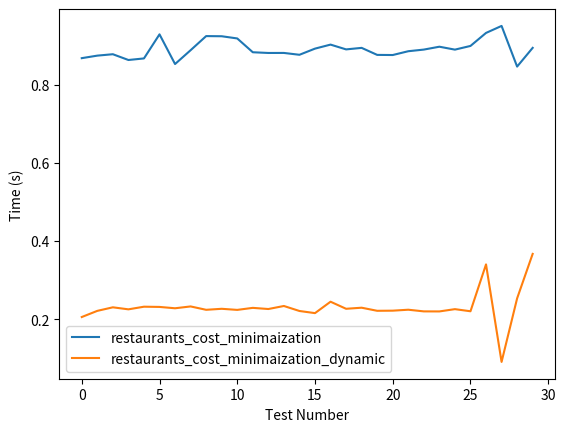

In [ ]:
# Compare performance of the solutions
def compare(test_results : List[float]):
    plt.plot(test_results[0], label='restaurants_cost_minimaization')
    plt.plot(test_results[1], label='restaurants_cost_minimaization_dynamic')
    plt.xlabel("Test Number")
    plt.ylabel("Time (s)")
    plt.legend()
compare(test_results)

# Question 20 - Rachel's Array

Rachel has an array A of 'n' integers. She doesn't like numbers that end in 0 or 5, however, this array may contain these kind of numbers.

Rachel decides to modify the array using only one type of move - she will choose a number 'm' that ends with 0 or 5 and will divide it by 5 once. She repeats this move until there are no numbers that end with 0 or 5 in the given array.

Your task is to help her implement this function in the optimal fashion.
Given an array on integers A, return the minimum number of 'moves' to obtain a modified array where none of its elements end in 0 or 5.

Example 1:<br>
A = {500, 15, 500, 3, 100, 1}

* Move 1: m = 15 => A = {500, 3, 500, 3, 100, 1}
* Move 2: m = 500 => A = {100, 3, 100, 3, 100, 1}
* Move 3: m = 100 => A = {20, 3, 20, 3, 20, 1}
* Move 4: m = 20 => A = {4, 3, 4, 3, 4, 1}

Minimum moves: 4

Example 2: <br>
A = {5, 25, 125}

* Move 1: m = 125 => A = {5, 25, 25}
* Move 2: m = 25 => A = {5, 5, 5}
* Move 3: m = 5 => A = {1, 1, 1}

Minimum moves: 3

**Examples:**
```
Input: {500, 15, 500, 3, 100, 1}
Output: 4
Input: {5, 25, 125}
Output: 3
```


---

Explain how would you generalize the problem (if instead of 0 and 5, Rachel didn't like numbers that end with 'k' or several digits).

In [ ]:
RULES = [
        { "is_applicable": (lambda x: x % 5 == 0), "calculation": (lambda x: int(x/5)) }
        ]

def is_candidate(x :int) -> bool:
    for rule in RULES:
        if rule['is_applicable'](x):
            return rule


def apply_move(a:List[int], candidate:int) -> List[int]:
    new_value = (is_candidate(candidate)["calculation"])(candidate)
    return [new_value if x == candidate else x for x in a]



def rachels_array(a:List[int]) -> int:
    min_steps = float('inf')
    min_move_list = []
    def _recursion(a:List[int], step:int = 0, move_list: List[any] = []):
        nonlocal min_steps, min_move_list
        candidates = set(filter(is_candidate,a))

        if len(candidates) == 0 and min_steps > step:
            min_steps = step
            min_move_list = move_list
        for candidate in candidates:
            tmp = apply_move(a, candidate)
            _recursion(a = tmp, step = (step+1), move_list = move_list+[{"Move": step+1, "m": candidate, "a": tmp}])

    _recursion(a, 0)

    pp.pprint(min_move_list)

    return min_steps



def dev():
    print("Minimum Moves:")
    print(rachels_array([500, 15, 500, 3, 100, 1]))
    print(rachels_array([5, 25, 125]))



def rachels_array2(a:List[int]) -> int:
    all_moves_list = {}
    def _recursion(a:List[int], step:int = 0, move_list: List[any] = []):
        candidates = set(filter(is_candidate,a))
        if len(candidates) == 0:
            all_moves_list.setdefault(step, []).append(move_list)
        for candidate in candidates:
            tmp = apply_move(a, candidate)
            _recursion(a = tmp, step = (step+1), move_list = move_list+[{"Move": step+1, "m": candidate, "a": tmp}])

    _recursion(a, 0)
    return(all_moves_list)


def dev2():
    print("Specifying all options:")
    pp.pprint(rachels_array2([500, 15, 500, 3, 100, 1]))
    pp.pprint(rachels_array2([5, 25, 125]))

dev()
dev2()

Minimum Moves:
[   {'Move': 1, 'a': [100, 15, 100, 3, 100, 1], 'm': 500},
    {'Move': 2, 'a': [20, 15, 20, 3, 20, 1], 'm': 100},
    {'Move': 3, 'a': [4, 15, 4, 3, 4, 1], 'm': 20},
    {'Move': 4, 'a': [4, 3, 4, 3, 4, 1], 'm': 15}]
4
[   {'Move': 1, 'a': [5, 25, 25], 'm': 125},
    {'Move': 2, 'a': [5, 5, 5], 'm': 25},
    {'Move': 3, 'a': [1, 1, 1], 'm': 5}]
3
Specifying all options:
{   4: [   [   {'Move': 1, 'a': [100, 15, 100, 3, 100, 1], 'm': 500},
               {'Move': 2, 'a': [20, 15, 20, 3, 20, 1], 'm': 100},
               {'Move': 3, 'a': [4, 15, 4, 3, 4, 1], 'm': 20},
               {'Move': 4, 'a': [4, 3, 4, 3, 4, 1], 'm': 15}],
           [   {'Move': 1, 'a': [100, 15, 100, 3, 100, 1], 'm': 500},
               {'Move': 2, 'a': [20, 15, 20, 3, 20, 1], 'm': 100},
               {'Move': 3, 'a': [20, 3, 20, 3, 20, 1], 'm': 15},
               {'Move': 4, 'a': [4, 3, 4, 3, 4, 1], 'm': 20}],
           [   {'Move': 1, 'a': [100, 15, 100, 3, 100, 1], 'm': 500},
             

# Question 21 - Escape from the Maze!
45 mins

You'll get a bi-dimensional array representing a Maze and you'll have to escape it!
Find out if it is possible to get from the top left (0,0) to the bottom right (n-1,n-1) corner of the maze.
You will be able to move to one of the 8 cells surrounding your cell if their content equals the content of your cell.

Write a code that returns true if you can move from the top-left corner to the bottom-right corner over a path composed of identically numbered squares.

You can move to an adjacent square in each step.
Each step may be made either:
* diagonally
* vertically
* horizontally

Example of inputs:
```
[
[1,0,0],
[1,1,0],
[0,0,1]
]
```
--> should return true there are 2 possible paths:
```(0,0)->(1,1)->(2,2) or (0,0)->(1,0)->(1,1)->(2,2)```
```
[
[1,0,0],
[1,0,1],
[0,0,1]
]
```
--> should return false as there is no possible path.

**Examples:**
```
1.
Input:
[
    [1, 0, 0],
    [1, 0, 0],
    [1, 1, 1]
]
Output: true
2.
Input:
[
    [1, 0, 0],
    [1, 0, 0],
    [1, 0, 1]
]
Output: false
```

---
 What is the complexity of the algorithm?

In [ ]:
if True:

    def ascape_the_maze(maze: List[List[int]]):
        np_board = np.array(maze)
        row_num, col_num  = np_board.shape
        np_board = np.c_[np.full((row_num,1),-1), np_board, np.full((row_num,1),-1)]
        np_board = np.vstack([np.full((1,col_num+2),-1), np_board, np.full((1,col_num+2),-1)])
        target = (row_num, col_num)
        paths = []
        def _recursion(curr_position, places_visited):
            for i in range(-1,2):
                for j in range(-1,2):
                    new_position = (curr_position[0] + i, curr_position[1] + j)
                    if new_position not in places_visited and np_board[curr_position] == np_board[new_position]:
                        places_visited_with_current = set().union(*[places_visited, {new_position}])
                        if new_position == target:
                            paths.append([(i-1,j-1) for i,j in places_visited_with_current])
                        else:
                            _recursion(new_position, places_visited_with_current)



        place_visited = {}
        place_visited[(1,1)] = True
        _recursion((1,1), place_visited)

        if len(paths) > 0:
            print(f'Possible Paths: {paths}')
            print(f'Count Paths: {len(paths)}')
            return True
        else:
            return False


    def dev():
        print("Example 0:")
        print(ascape_the_maze([
                            [1, 1, 1],
                            [1, 1, 1],
                            [1, 1, 1]
                        ]))

        print("\n\nExample 1:")
        print(ascape_the_maze([
                            [1, 0, 0],
                            [1, 1, 0],
                            [0, 0, 1]
                        ]))


        print("\n\nExample 2:")
        print(ascape_the_maze([
                            [1, 0, 0],
                            [1, 0, 0],
                            [1, 1, 1]
                        ]))

        print("\n\nExample 3:")
        print(ascape_the_maze([
                            [1,0,0],
                            [1,0,1],
                            [0,0,1]
                            ]))


        #print("\n\nExample 4:")
        #print(ascape_the_maze([
        #                    [1,0,0,1,0],
        #                    [1,0,0,0,1],
        #                    [1,1,1,0,1],
        #                    [1,1,1,0,1],
        #                    [1,1,1,1,1]
        #                    ]))
    dev()

Example 0:
Possible Paths: [[(0, 1), (1, 0), (2, 0), (0, 0), (1, 2), (2, 2), (1, 1), (2, 1), (0, 2)], [(0, 1), (2, 2), (1, 0), (1, 1), (2, 0), (0, 0), (0, 2), (2, 1)], [(1, 2), (0, 1), (2, 2), (1, 0), (1, 1), (0, 0), (0, 2), (2, 1)], [(0, 1), (2, 2), (1, 0), (1, 1), (0, 0), (0, 2), (2, 1)], [(1, 2), (0, 1), (2, 2), (1, 1), (0, 0), (0, 2), (2, 1)], [(1, 2), (0, 1), (2, 2), (1, 1), (0, 0), (0, 2)], [(0, 1), (1, 0), (2, 0), (0, 0), (1, 2), (2, 2), (1, 1), (2, 1), (0, 2)], [(0, 1), (2, 2), (1, 0), (1, 1), (2, 0), (0, 0), (0, 2), (2, 1)], [(1, 2), (0, 1), (2, 2), (1, 1), (2, 0), (0, 0), (0, 2), (2, 1)], [(0, 1), (2, 2), (1, 1), (2, 0), (0, 0), (0, 2), (2, 1)], [(1, 2), (0, 1), (2, 2), (1, 1), (0, 0), (0, 2), (2, 1)], [(0, 1), (2, 2), (1, 1), (0, 0), (0, 2), (2, 1)], [(0, 1), (2, 2), (1, 1), (0, 0), (0, 2)], [(0, 1), (1, 0), (2, 0), (0, 0), (1, 2), (2, 2), (1, 1), (2, 1), (0, 2)], [(1, 2), (0, 1), (2, 2), (1, 0), (1, 1), (0, 0), (0, 2), (2, 1)], [(0, 1), (1, 0), (2, 0), (0, 0), (1, 2), (2, 2

# Question 22 - Trading Strategy (Data Science)
The Scenario - You have just begun working as a Data Scientist in a leading hedge fund.

The Chief Investment Officer (CIO) has come up with a great idea for a new trading strategy, and has asked you to run a trading simulation based on the given data and revert back with the results.

In order to do so, you will follow five steps:

* Download the attached CSV file below and read it using R or Python in your local machine.
* Process the data and add supporting columns.
* Implement the trading strategy and decide on trades.
* Analyze the result of the trades
* Submission - upload the edited CSV file along with your code.

Note: these are simplified scenarios and strategies. Real-life trading strategies are more complex.

<u>CSV Glossary</u>

* Date - the date in which the data was recorded
* Open - the price of a stock when the stock exchange opened shop for the day
* High - the highest price at which a stock traded during the given date
* Low - the lowest price at which a stock traded during the given date
* Close -  the price of a stock when the stock exchange closed shop for the day
* Volume - the total amount of trading activity in the stock


File:
https://app.noteable.io/f/112d6cd5-eaf3-4d3c-bc8a-11e931e11cae

<br>

**Step 1 - Before we begin**

Please download the CSV file attached above. Open and read it in R or Python (you may use any library or none).
Whenever you are required to add columns to the CSV file, you should do it using R or Python, and not directly on the CSV.

**Step 2 - Process the data and add supporting columns**
The signal that the strategy will rely on is the change in the close price from day to day. You will calculate the percentage change as opposed to the absolute change value (i.e if the close price changed from $10 to $12, the percentage change is 20%).

Add a new column to the CSV file that describes the close percentage change - the percentage change of the close price compared to the close price of the previous day
For example, when calculating the close percentage change of the second day (2020-06-02), you calculate the percentage change from the close price of the previous day - 3,056.79, to the close price of the target day - 2,858.28. The percentage change between 3,056.79 to 2,858.28 is -6.49%.

Note - the percent change of the first day should be 0% because there is no data to compare it to.

For example, here are the first two rows of the table after adding "percent change"

Questions:

* What is the maximum percent change? Format your answer as follows: XX.X (round your answer to 1 decimal point).

* Select the two dates where you can find the maximum and the minimum percent change.

Should be: 2021-02-08, 2021-05-19


**Step 3 - Implement the trading strategy and decide on trades**<br>
Since this strategy is based only on the close percentage change column you calculated in the previous step, you can now proceed to implementing the strategy and deciding on the trades.

Please add the "Is Trade" column which contains the values True/False to specify if a trade should be executed or not (respectively), based on the instructions below:

The strategy will trade based on the Absolute Integer Change value, which is calculated in the following way -
Take the absolute value of the "percent change" (i.e  -0.06494 from the second row is now 0.06494)
Multiply the result from the 1st step by 100 to get a percentage (i.e 0.06494 from step 1 is now 6.494)
Round the number from the previous step to 0 decimal points (i.e 6.494 from step 2 is now 6)

For example, the Absolute Integer Change of the second row is 6 and of the third row is 1.

A trade should be executed if the Absolute Integer Change is even and greater than 0. Otherwise, "Is Trade" value should be False.

**Step 4 - Analyze the result of the trades**
4.1 Calculating Profits

According to the strategy, for every day where “Is Trade” = True, buy the stock on the same day's close price and sell it at the following day’s close price.

Add a new column to the CSV file - “profit”, according to the following instructions:
If a stock was purchased at $10 and later sold at $12, the profit is $2 out of a $10 deal, which means a profit of 20%.
If a stock was purchased at $10 and later sold at $7, the profit is -$3 out of a $10 deal - which means a profit of -30% (or a loss of 30%).

Note - if "Is Trade" is False, meaning there should not be a trade, then the profit is 0%.

Questions :
* What is the average profit percent per trade (round your results to 2 decimal points)?

4.2 Calculating Total Profits
From looking at each trade's profit, as you calculated in the previous step, you are not able to see the whole picture. To obtain this, you are required to calculate the total profit, which is the aggregation of the daily profits.

Add a total profits column to the CSV file, that aggregates the values of the strategy’s daily profits.
For example, if the profit of the first 3 days are [1%, -0.3%, 2%], then the total profits for these days will appear as follows: [1%, 0.7%, 2.7%].

Questions:
* What is the total profit percentage of this strategy (round the result to 2 decimal points, i.e XX.XX%)?
* On what dates did the maximum and minimum total profits first occur?
2020-11-30, 2021-05-10

4.3 Calculating Maximum Drawdown

Maximum Drawdown is one of the most important factors when it comes to evaluating trading strategies. It describes the maximum potential loss of a portfolio between its peak and trough, before a new peak is achieved.

For example, suppose the total profits where [0%, -0.5%, -1.2%, 0.3%, 4.3%, 2%, 5%] - then there are two drawdowns:
On the first 3 days, the total profit dropped from 0% to -1.2% - a drawdown of 1.2%.
From day 5 to 6, the totla profit dropped from 4.3% to 2% - a drawdown of 2.3%

The maximum drawdown, which represents the worst-case scenario, in this case is 2.3%.

Calculate the maximum drawdown percentage of the strategy (round the result to 2 decimal points, i.e XX.XX).

In [ ]:
MAX_COINS = 9
def withdraw(amount):
  def _internal(amount, atm_content, bills, total_coins):
    if len(result) >= 1:
      return
    for curr_bill, bill_amount in atm_content.items():
      if bill_amount == 0:
        continue

      if curr_bill == 1:
        if total_coins+1<=MAX_COINS:
          total_coins += 1
        else:
          return

      if curr_bill == amount:
        result.append(bills+[curr_bill])
        return
      elif curr_bill < amount:
        tmp = {k: v for k, v in atm_content.items() if k <= curr_bill}
        tmp[curr_bill] -= 1
        _internal(amount-curr_bill, tmp, bills+[curr_bill], total_coins)

  result = []
  _internal(amount = amount,
            atm_content = {
                    50 : 100,
                    20 : 100,
                    1 : 100
                  },
                  bills = [], total_coins = 0)
  return result


x = withdraw(60)
print(x)
if False:
  atm_content = {
                      50 : 100,
                      20 : 100,
                      1 : 100
                    }

#t = atm_content.copy()
#t = {k: v for k, v in atm_content.items() if k <= 200}

#print(t)


[[20, 20, 20]]


# Best Time to Buy and Sell Stock II

You are given an integer array prices where prices[i] is the price of a given stock on the ith day.

On each day, you may decide to buy and/or sell the stock. You can only hold at most one share of the stock at any time. However, you can buy it then immediately sell it on the same day.

Find and return the maximum profit you can achieve.

Example 1:
```
Input: prices = [7,1,5,3,6,4]
Output: 7
Explanation: Buy on day 2 (price = 1) and sell on day 3 (price = 5), profit = 5-1 = 4.
Then buy on day 4 (price = 3) and sell on day 5 (price = 6), profit = 6-3 = 3.
Total profit is 4 + 3 = 7.
```

Example 2:
```
Input: prices = [1,2,3,4,5]
Output: 4
Explanation: Buy on day 1 (price = 1) and sell on day 5 (price = 5), profit = 5-1 = 4.
Total profit is 4.
```
Example 3:
```
Input: prices = [7,6,4,3,1]
Output: 0
Explanation: There is no way to make a positive profit, so we never buy the stock to achieve the maximum profit of 0.
```

In [ ]:
# combinations of selecting 2 from list of prices
from itertools import combinations
def maxProfit(prices):
  #print(all_selling_buying_options)
  possible_solution = []
  def _internal(profit, selected_buy_sell_combo, remaining_selling_buying_option):
    if len(remaining_selling_buying_option) == 0:
      possible_solution.append((selected_buy_sell_combo, profit))
    else:
      for position, buy_sell_option in enumerate(remaining_selling_buying_option):
        curr_prof = -prices[buy_sell_option[0]] + prices[buy_sell_option[1]]
        _internal(
                  profit= profit + curr_prof,
                  selected_buy_sell_combo = selected_buy_sell_combo + [buy_sell_option],
                  remaining_selling_buying_option = list(filter(lambda x: buy_sell_option[1] < x[0],remaining_selling_buying_option))
                  )

  _internal(0, [], list(combinations(list(range(len(prices))), 2)))
  possible_solution.sort(key = lambda x: x[1], reverse = True)
  return possible_solution[0][1] if possible_solution[0][1] > 0 else 0


def test():
  assert maxProfit([7,1,5,3,6,4]) == 7
  assert maxProfit([1,2,3,4,5]) == 4
  assert maxProfit([7,6,4,3,1]) == 0


test()


In [ ]:
def maxProfit2(prices: List[int]) -> int:
        ans,flag,buy = 0, 0, 10 ** 10
        if len(prices) <= 1:
            return 0
        for i in range(len(prices) - 1):
            if prices[i + 1] > prices[i]:
                if not flag:
                    flag = 1
                    buy = prices[i]
            else:
                if flag:
                    flag = 0
                    ans += prices[i] - buy
                    buy = 10 **  10
        ans += (prices[i + 1] - buy > 0) * (prices[i + 1] - buy)
        return ans


maxProfit2([7,6,4,3,1])

0

# Jump Game

ou are given an integer array nums. You are initially positioned at the array's first index, and each element in the array represents your maximum jump length at that position.

Return true if you can reach the last index, or false otherwise.

Example 1:
```
Input: nums = [2,3,1,1,4]
Output: true
Explanation: Jump 1 step from index 0 to 1, then 3 steps to the last index.
```


Example 2:
```
Input: nums = [3,2,1,0,4]
Output: false
Explanation: You will always arrive at index 3 no matter what. Its maximum jump length is 0, which makes it impossible to reach the last index.
```

In [ ]:
def jumpGame(nums: List[int]) -> bool:
        j=0
        k=nums[j]
        while(k and j<len(nums)-1):
            j+=1
            k-=1
            if nums[j]>k:
                k=nums[j]
        if j>=len(nums)-1:
            return True
        else:
            return False

print(jumpGame([2,3,1,0,4]))



True


# Gas Station

There are n gas stations along a circular route, where the amount of gas at the ith station is gas[i].

You have a car with an unlimited gas tank and it costs cost[i] of gas to travel from the ith station to its next (i + 1)th station. You begin the journey with an empty tank at one of the gas stations.

Given two integer arrays gas and cost, return the starting gas station's index if you can travel around the circuit once in the clockwise direction, otherwise return -1. If there exists a solution, it is guaranteed to be unique

Example1:

```
Input: gas = [1,2,3,4,5], cost = [3,4,5,1,2]
Output: 3
Explanation:
Start at station 3 (index 3) and fill up with 4 unit of gas. Your tank = 0 + 4 = 4
Travel to station 4. Your tank = 4 - 1 + 5 = 8
Travel to station 0. Your tank = 8 - 2 + 1 = 7
Travel to station 1. Your tank = 7 - 3 + 2 = 6
Travel to station 2. Your tank = 6 - 4 + 3 = 5
Travel to station 3. The cost is 5. Your gas is just enough to travel back to station 3.
Therefore, return 3 as the starting index.
```

Example2:
```
Input: gas = [2,3,4], cost = [3,4,3]
Output: -1
Explanation:
You can't start at station 0 or 1, as there is not enough gas to travel to the next station.
Let's start at station 2 and fill up with 4 unit of gas. Your tank = 0 + 4 = 4
Travel to station 0. Your tank = 4 - 3 + 2 = 3
Travel to station 1. Your tank = 3 - 3 + 3 = 3
You cannot travel back to station 2, as it requires 4 unit of gas but you only have 3.
Therefore, you can't travel around the circuit once no matter where you start.
```

In [ ]:
def gasStation(gas, cost):
    def internal(gas, cost, start_station):
        tank = 0
        for i in range(0, len(gas)):
            tank = tank + gas[i] - cost[i]
            if tank < 0:
                return -1
        return start_station


    for i in range(0, len(gas)):
      position_to_start = internal(gas, cost, i)
      if position_to_start > -1:
        return position_to_start
      cost.append(cost.pop(0))
      gas.append(gas.pop(0))
    return -1


print(gasStation(gas = [1,2,3,4,5], cost = [3,4,5,1,2]))

print(gasStation(gas = [2,3,4], cost = [3,4,3]))

3
-1


In [ ]:
def gasStationCircleGenerator(gas, cost):
    curr_station = 0
    num_of_stations = len(gas)
    while curr_station < num_of_stations:
        yield curr_station, gas, cost
        curr_station = curr_station + 1
        cost.append(cost.pop(0))
        gas.append(gas.pop(0))

def gasStationWithGenerator(gas, cost):
    def internal(gas, cost):
        tank = 0
        for i in range(0, len(gas)):
            tank = tank + gas[i] - cost[i]
            if tank < 0:
                return False
        return True

    for start_station, gas, cost in gasStationCircleGenerator(gas, cost):
        if internal(gas, cost):
          return start_station
    return -1


print(gasStationWithGenerator(gas = [1,2,3,4,5], cost = [3,4,5,1,2]))

print(gasStationWithGenerator(gas = [2,3,4], cost = [3,4,3]))

3
-1


# Candy

There are n children standing in a line. Each child is assigned a rating value given in the integer array ratings.

You are giving candies to these children subjected to the following requirements:

* Each child must have at least one candy.
* Children with a higher rating get more candies than their neighbors.

Return the minimum number of candies you need to have to distribute the candies to the children.

Example1:
```
Input: ratings = [1,0,2]
Output: 5
Explanation: You can allocate to the first, second and third child with 2, 1, 2 candies respectively.
```
Example2:
```
Input: ratings = [1,2,2]
Output: 4
Explanation: You can allocate to the first, second and third child with 1, 2, 1 candies respectively.
The third child gets 1 candy because it satisfies the above two conditions.
```


Link: https://leetcode.com/problems/candy/?envType=study-plan-v2&envId=top-interview-150

In [ ]:
def candy(ratings):
    def check_left(pos):
        if pos == 0:
            return
        if ratings[pos] > ratings[pos-1] and ret_array[pos] <= ret_array[pos-1]:
            ret_array[pos] = ret_array[pos-1] + 1
            check_right(pos+1)

    def check_right(pos):
        if pos == len(ratings)-1:
            return
        if ratings[pos] > ratings[pos+1] and ret_array[pos] <= ret_array[pos+1]:
            ret_array[pos] = ret_array[pos+1] + 1
            check_left(pos-1)

    ret_array = [1] * len(ratings)
    for i,_ in enumerate(ratings):
        check_right(i)

    for i in reversed(range(len(ratings))):
        check_left(i)
    return sum(ret_array)

print(candy([1,0,2]))

print(candy([1,2,2]))

5
4


# Trapping Rain Water

Given n non-negative integers representing an elevation map where the width of each bar is 1, compute how much water it can trap after raining.

See example in link, can't undesrtand without.

https://leetcode.com/problems/trapping-rain-water/?envType=study-plan-v2&envId=top-interview-150



In [ ]:
def calculateTrappedRainWatter(height):
    def calculate_between(l, r):
        return (min(height[l],height[r])*(r-l-1)) - (sum(height[l+1:r]))

    total = 0
    max_pos = height.index(max(height))
    curr_pos = max_pos
    while curr_pos < len(height)-1:
        tmp = height[(curr_pos+1):]
        new_max_pos = curr_pos + tmp.index(max(tmp)) + 1
        total += calculate_between(curr_pos, new_max_pos)
        curr_pos = new_max_pos

    curr_pos = max_pos
    while curr_pos > 0:
        new_max_pos = height.index(max(height[:curr_pos]))
        total += calculate_between(new_max_pos, curr_pos)
        curr_pos = new_max_pos

    return total




print(calculateTrappedRainWatter([0,1,0,2,1,0,1,3,2,1,2,1]))

print(calculateTrappedRainWatter([4,2,0,3,2,5]))

6
9


M

# Papaya Gaming Interview Question

Create a parallel runner class - executing code in parallel.

* The class should recieve functions using the add method.

* The resolve method recieves a number of workers and we need to make sure that there are this number of workers running, not less, untill we finish all the tasks.

* The return value should be the result of the functions, ordered as they were recieved.

* the test_func is an example of a function that takes time.

In [ ]:
from functools import partial
import asyncio
import random


class ParallelRunner:
    functions = []
    index = 0
    async def add(self, func):
        self.functions.append(func)



    async def task_executor(self):
        while self.functions:
            loc_index = self.index
            self.index += 1
            tmp = await self.functions.pop(0)()
            self.ret_values[loc_index] = tmp


    async def resolve(self, num_workers):
        self.ret_values = [0] * len(self.functions)
        tasks = []
        if True:
            for _ in range(num_workers):
                task = asyncio.ensure_future(self.task_executor())
                tasks.append(task)

        await asyncio.gather(*tasks)
        return self.ret_values

async def test_func(i):
    seconds_to_wait = random.randint(1, 5)
    await asyncio.sleep(seconds_to_wait)
    print(i)
    return i


async def main():
    parallelRunner = ParallelRunner()
    for i in range(50):
        await parallelRunner.add(partial(test_func, i))
        print(f"added {i}")



    print(await parallelRunner.resolve(10))


if __name__ == '__main__':
    #asyncio.run(main())
    await main()

added 0
added 1
added 2
added 3
added 4
added 5
added 6
added 7
added 8
added 9
added 10
added 11
added 12
added 13
added 14
added 15
added 16
added 17
added 18
added 19
added 20
added 21
added 22
added 23
added 24
added 25
added 26
added 27
added 28
added 29
added 30
added 31
added 32
added 33
added 34
added 35
added 36
added 37
added 38
added 39
added 40
added 41
added 42
added 43
added 44
added 45
added 46
added 47
added 48
added 49
6
7
9
5
1
2
3
4
8
10
11
14
15
0
21
13
12
17
19
20
24
16
27
28
22
29
18
23
35
31
38
26
33
37
25
30
32
34
42
36
43
40
41
39
49
47
48
44
45
46
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


# Targil - Monday.com

Step 1 - Write a script that uses the REST API located at https://pokeapi.co/ to get Pokémon data as JSON and print it to the console.

Step 2 - Insert the obtained data into a database, ensuring that it is parsed and sent to the correct columns in the pokemons table. Extract the id from the URL and insert it along with the name and URL into the pokemons table.

Step 3 - Insert the Pokémon abilities data from the same REST API into the pokemon_abilities table. Insert the data into columns id, name, and abilities (abilities will be inserted as a string).

Bonus - Print both tables as a DataFrame.

In [ ]:
# First solution - using pandas and sync work.
import requests
import pandas as pd
import sqlite3
import pandas as pd
import json

import sqlite3
con = sqlite3.connect("temp.db")
cursor = con.cursor()
URL = 'https://pokeapi.co/api/v2/pokemon?limit=10'
ABBILITIES_URL = "https://pokeapi.co/api/v2/pokemon/"
con.execute('create table if not exists pokemons (id int , name string , url string )')
con.execute('create table if not exists pokemons_abilities (id int , name string , abilities string )')

def get_pokemon_data(url):
    res = requests.get(url)
    res.json()['results']
    pkd = pd.DataFrame.from_dict(res.json()['results'])
    return pkd


def insert_pokemon_data(url):
    # write your code here
    pokemon_data = get_pokemon_data(url)
    pokemon_data['id'] = pokemon_data['url'].apply(lambda x: int(x.split('/')[len(x.split('/'))-2]))
    pd_for_insert = pd.DataFrame(pokemon_data, columns=['id', 'name', 'url'])
    pd_for_insert.set_index('id', inplace=True)
    pd_for_insert.to_sql('pokemons', con, if_exists='replace')
    con.commit()


def get_pokemon_abbilities(pokemon_name):
    tgt_url = ABBILITIES_URL + pokemon_name
    res = requests.get(tgt_url)
    abilities = json.dumps((res.json()['abilities'])[:3])
    return(abilities)

def insert_pokemon_abbilities():
    df = pd.read_sql(f'SELECT * FROM pokemons', con, index_col='id')
    df['abbilities'] = df['name'].apply(lambda x: get_pokemon_abbilities(x))
    df_for_insert = pd.DataFrame(df, columns=['name', 'abbilities'])
    df_for_insert.to_sql('pokemons_abilities', con, if_exists='replace')


def truncate_table(table):
    con.execute(f'DELETE FROM {table}')
    con.commit()

def query_table(table):
    print(f'query table {table}:')
    return pd.read_sql(f'SELECT * FROM {table}', con, index_col='id')


truncate_table('pokemons')
truncate_table('pokemons_abilities')
print(query_table('pokemons'))
print(query_table('pokemons_abilities'))
insert_pokemon_data(URL)
print(query_table('pokemons'))
insert_pokemon_abbilities()
print(query_table('pokemons_abilities'))
print('finished')

query table pokemons:
Empty DataFrame
Columns: [name, url]
Index: []
query table pokemons_abilities:
Empty DataFrame
Columns: [name, abbilities]
Index: []
query table pokemons:
          name                                    url
id                                                   
1    bulbasaur   https://pokeapi.co/api/v2/pokemon/1/
2      ivysaur   https://pokeapi.co/api/v2/pokemon/2/
3     venusaur   https://pokeapi.co/api/v2/pokemon/3/
4   charmander   https://pokeapi.co/api/v2/pokemon/4/
5   charmeleon   https://pokeapi.co/api/v2/pokemon/5/
6    charizard   https://pokeapi.co/api/v2/pokemon/6/
7     squirtle   https://pokeapi.co/api/v2/pokemon/7/
8    wartortle   https://pokeapi.co/api/v2/pokemon/8/
9    blastoise   https://pokeapi.co/api/v2/pokemon/9/
10    caterpie  https://pokeapi.co/api/v2/pokemon/10/
query table pokemons_abilities:
          name                                         abbilities
id                                                               
1    bulbas

## Monday solution with asyncio

In [ ]:
import requests
import pandas as pd
import sqlite3
import json
import asyncio
import aiohttp
import sqlite3
from functools import partial
con = sqlite3.connect("temp.db")
cursor = con.cursor()
URL = 'https://pokeapi.co/api/v2/pokemon?limit=10&offset=0'
ABBILITIES_URL = "https://pokeapi.co/api/v2/pokemon/"
con.execute('create table if not exists pokemons (id int , name string , url string )')
con.execute('create table if not exists pokemons_abilities (id int , name string , abilities string )')

def get_pokemon_data(url):
    res = requests.get(url)
    res.json()['results']
    pkd = pd.DataFrame.from_dict(res.json()['results'])
    return pkd


def insert_pokemon_data(url):
    # write your code here
    pokemon_data = get_pokemon_data(url)
    pokemon_data['id'] = pokemon_data['url'].apply(lambda x: int(x.split('/')[len(x.split('/'))-2]))
    pd_for_insert = pd.DataFrame(pokemon_data, columns=['id', 'name', 'url'])
    pd_for_insert.set_index('id', inplace=True)
    pd_for_insert.to_sql('pokemons', con, if_exists='replace')
    con.commit()


async def get_pokemon_abbilities(session,pokemon_name):
    tgt_url = ABBILITIES_URL + pokemon_name
    res = await session.get(tgt_url)
    json_tmp = await res.json()
    abilities = json.dumps(json_tmp['abilities'][:3])
    return abilities

async def insert_pokemon_abbilities():
    df = pd.read_sql(f'SELECT * FROM pokemons', con, index_col='id')
    async with aiohttp.ClientSession() as session:
      functions = list(df['name'].map(lambda name: partial(get_pokemon_abbilities, session, name)()))
      abilities = await asyncio.gather(*functions)

    abbilities_series = pd.Series(abilities)
    abbilities_series.index += 1
    df_for_insert = pd.DataFrame(df, columns=['name'])
    df_for_insert['abbilities'] = abbilities_series
    df_for_insert.to_sql('pokemons_abilities', con, if_exists='replace')


def truncate_table(table):
    con.execute(f'DELETE FROM {table}')
    con.commit()

def query_table(table):
    print(f'query table {table}:')
    return pd.read_sql(f'SELECT * FROM {table}', con, index_col='id')





truncate_table('pokemons')
truncate_table('pokemons_abilities')
print(query_table('pokemons'))
print(query_table('pokemons_abilities'))
insert_pokemon_data(URL)
print(query_table('pokemons'))
if not is_notebook():
  if True:
    loop = asyncio.get_event_loop()
    loop.run_until_complete(insert_pokemon_abbilities())
  else:
    # option 2:
    asyncio.run(insert_pokemon_abbilities())
else:
  # inside a notebook just run this - it would work because we are in an async env
  await insert_pokemon_abbilities()

# asyncio.run(insert_pokemon_abbilities())
print(query_table('pokemons_abilities'))
print('finished')

query table pokemons:
Empty DataFrame
Columns: [name, url]
Index: []
query table pokemons_abilities:
Empty DataFrame
Columns: [name, abbilities]
Index: []
query table pokemons:
          name                                    url
id                                                   
1    bulbasaur   https://pokeapi.co/api/v2/pokemon/1/
2      ivysaur   https://pokeapi.co/api/v2/pokemon/2/
3     venusaur   https://pokeapi.co/api/v2/pokemon/3/
4   charmander   https://pokeapi.co/api/v2/pokemon/4/
5   charmeleon   https://pokeapi.co/api/v2/pokemon/5/
6    charizard   https://pokeapi.co/api/v2/pokemon/6/
7     squirtle   https://pokeapi.co/api/v2/pokemon/7/
8    wartortle   https://pokeapi.co/api/v2/pokemon/8/
9    blastoise   https://pokeapi.co/api/v2/pokemon/9/
10    caterpie  https://pokeapi.co/api/v2/pokemon/10/
query table pokemons_abilities:
          name                                         abbilities
id                                                               
1    bulbas

## Monday solution with asyncio and workers

In [ ]:
import requests
import pandas as pd
import sqlite3
import json
import asyncio
import aiohttp
import sqlite3
from functools import partial
import aiosqlite
con = sqlite3.connect("temp.db")
cursor = con.cursor()
LIMIT=10
NUM_WORKERS = 5
URL = f'https://pokeapi.co/api/v2/pokemon?limit={LIMIT}&offset=##OFFSET##'
ABBILITIES_URL = "https://pokeapi.co/api/v2/pokemon/"
con.execute('drop table pokemons_abilities')
con.execute('create table if not exists pokemons (id int , name string , url string )')
con.execute('create table if not exists pokemons_abilities (id int , name string , abilities string )')

current_index = 0
max_total_data = 100


async def get_pokemon_data_for_page(session, url):
    res = await session.get(url)
    json_tmp = await res.json()
    if len(json_tmp['results']) == 0:
        return pd.DataFrame()
    pokemon_data = pd.DataFrame.from_dict(json_tmp['results'])
    pokemon_data['id'] = pokemon_data['url'].apply(lambda x: int(x.split('/')[len(x.split('/'))-2]))
    return pokemon_data

async def worker_execution(session, db, worker_num):
    global max_page
    global current_index
    if True:
        print(f'Worker Number {worker_num} is starting...')
        while current_index < max_total_data:
            tgt_url = URL.replace("##OFFSET##", str(current_index))
            current_index += LIMIT
            print(f'Worker Number {worker_num} is getting {tgt_url}')
            pokemon_data = await get_pokemon_data_for_page(session, tgt_url)
            if pokemon_data.size == 0:
                max_page = current_index
                break
            pd_for_insert = pd.DataFrame(pokemon_data, columns=['id', 'name', 'url'])
            pd_for_insert['sql'] = "("+pd_for_insert['id'].astype(str) +",\""+ pd_for_insert['name'] +"\",\""+  pd_for_insert['url'] +"\")"
            sql = "INSERT INTO pokemons (id, name, url) VALUES "+",".join(list(pd_for_insert["sql"]))
            await db.execute(sql)
            await db.commit()
            print(f'Worker Number {worker_num} inserted rows')
            df_with_abbilities = await get_pokemon_abbilities_for_page(pokemon_data)
            df_with_abbilities['sql'] = "("+df_with_abbilities['id'].astype(str) +",\""+ df_with_abbilities['name'] +"\",\'"+  df_with_abbilities['abbilities'] +"\')"
            sql_abbilities = "INSERT INTO pokemons_abilities (id, name, abilities) VALUES "+",".join(list(df_with_abbilities["sql"]))
            await db.execute(sql_abbilities)
            await db.commit()

        print(f'Finished Worker Number {worker_num}...')


async def get_pokemon_abbilities_for_page(pokemon_data):
    async with aiohttp.ClientSession() as session_inner:
      abbilities_calls = list(pokemon_data['name'].map(lambda name: partial(get_pokemon_abbilities, session_inner, name)()))
      abilities = await asyncio.gather(*abbilities_calls)

    pd.DataFrame(abilities)
    abilities_df = pd.DataFrame(abilities).set_index('key')
    pokemon_data.set_index('name', inplace=True,drop=False)
    joined_df = pokemon_data.join(abilities_df)
    return joined_df



async def activate_async_workers(url, limit):
    workers = []
    async with aiohttp.ClientSession() as session:
        async with aiosqlite.connect("temp.db") as db:
            for curr_worker in range(NUM_WORKERS):
                workers.append(partial(worker_execution, session, db, curr_worker)())
            work_results = await asyncio.gather(*workers)
    print("got all pages")


async def get_pokemon_abbilities(session,pokemon_name):
    tgt_url = ABBILITIES_URL + pokemon_name
    res = await session.get(tgt_url)
    json_tmp = await res.json()
    abilities = json.dumps(json_tmp['abilities'][:3])
    return {'key' : pokemon_name, 'abbilities' : abilities}


def truncate_table(table):
    con.execute(f'DELETE FROM {table}')
    con.commit()

def query_table(table):
    print(f'query table {table}:')
    return pd.read_sql(f'SELECT * FROM {table}', con, index_col='id')





truncate_table('pokemons')
truncate_table('pokemons_abilities')
print(query_table('pokemons'))
print(query_table('pokemons_abilities'))
if is_notebook():
  await activate_async_workers(URL, 3)
else:
  asyncio.run(activate_async_workers(URL, 3))
print(query_table('pokemons'))
print(query_table('pokemons_abilities'))
print('finished')

query table pokemons:
Empty DataFrame
Columns: [name, url]
Index: []
query table pokemons_abilities:
Empty DataFrame
Columns: [name, abilities]
Index: []
Worker Number 0 is starting...
Worker Number 0 is getting https://pokeapi.co/api/v2/pokemon?limit=10&offset=0
Worker Number 1 is starting...
Worker Number 1 is getting https://pokeapi.co/api/v2/pokemon?limit=10&offset=10
Worker Number 2 is starting...
Worker Number 2 is getting https://pokeapi.co/api/v2/pokemon?limit=10&offset=20
Worker Number 3 is starting...
Worker Number 3 is getting https://pokeapi.co/api/v2/pokemon?limit=10&offset=30
Worker Number 4 is starting...
Worker Number 4 is getting https://pokeapi.co/api/v2/pokemon?limit=10&offset=40
Worker Number 4 inserted rows
Worker Number 3 inserted rows
Worker Number 2 inserted rows
Worker Number 0 inserted rows
Worker Number 1 inserted rows
Worker Number 4 is getting https://pokeapi.co/api/v2/pokemon?limit=10&offset=50
Worker Number 0 is getting https://pokeapi.co/api/v2/pokemon?l

#  Text Justification

Given an array of strings words and a width maxWidth, format the text such that each line has exactly maxWidth characters and is fully (left and right) justified.

You should pack your words in a greedy approach; that is, pack as many words as you can in each line. Pad extra spaces ' ' when necessary so that each line has exactly maxWidth characters.

Extra spaces between words should be distributed as evenly as possible. If the number of spaces on a line does not divide evenly between words, the empty slots on the left will be assigned more spaces than the slots on the right.

For the last line of text, it should be left-justified, and no extra space is inserted between words.

Note:

A word is defined as a character sequence consisting of non-space characters only.
Each word's length is guaranteed to be greater than 0 and not exceed maxWidth.
The input array words contains at least one word.


```
Example 1:

Input: words = ["This", "is", "an", "example", "of", "text", "justification."], maxWidth = 16
Output:
[
   "This    is    an",
   "example  of text",
   "justification.  "
]
Example 2:

Input: words = ["What","must","be","acknowledgment","shall","be"], maxWidth = 16
Output:
[
  "What   must   be",
  "acknowledgment  ",
  "shall be        "
]
Explanation: Note that the last line is "shall be    " instead of "shall     be", because the last line must be left-justified instead of fully-justified.
Note that the second line is also left-justified because it contains only one word.
Example 3:

Input: words = ["Science","is","what","we","understand","well","enough","to","explain","to","a","computer.","Art","is","everything","else","we","do"], maxWidth = 20
Output:
[
  "Science  is  what we",
  "understand      well",
  "enough to explain to",
  "a  computer.  Art is",
  "everything  else  we",
  "do                  "
]
 ```

In [ ]:
import traceback



def text_justification(words, maxWidth):

    def prepare_line():
        if len(line) == 1:
            line.append('')
        spaces_divide_equally = 0
        while len((' '*(spaces_divide_equally+1)).join(line)) <= maxWidth:
            spaces_divide_equally += 1

        output = (' '*(spaces_divide_equally)).join(line)
        if len(output) == maxWidth:
            return output
        else:
            for index in range(maxWidth - len(output)):
                line[index] += ' '
            output = (' '*(spaces_divide_equally)).join(line)
            return output

    def prepare_last_line():
        output = ' '.join(line)
        output += ' '*(maxWidth - len(output))
        return output

    line = []
    justifiedText = []
    while words:
        new_word = [words.pop(0)]
        if len(' '.join(line + new_word)) > maxWidth:
            justifiedText.append(prepare_line())
            line = new_word
        else:
            line.append(new_word[0])

    justifiedText.append(prepare_last_line())

    if len(list(filter(lambda size: size != maxWidth,map(lambda line: len(line), justifiedText)))) > 0:
          raise Exception(f'Error Occured, see the justifiedText: {justifiedText}')
    else:
        return justifiedText







def test():
  print(f'Example 1:\n', '\n'.join(text_justification(words = ["This", "is", "an", "example", "of", "text", "justification."], maxWidth = 16)))
  print(f'\n\nExample 2:\n', '\n'.join(text_justification(words = ["What","must","be","acknowledgment","shall","be"], maxWidth = 16)))
  print(f'\n\nExample 3:\n', '\n'.join(text_justification(words = ["Science","is","what","we","understand","well","enough","to","explain","to","a","computer.","Art","is","everything","else","we","do"], maxWidth = 20)))


try:
    test()
except Exception as e:
    print(f'Error Occured: {e}')
    tb = traceback.format_exc()
    print(f'Traceback: {tb}')
    print('END')


Example 1:
 This    is    an
example  of text
justification.  


Example 2:
 What   must   be
acknowledgment  
shall be        


Example 3:
 Science  is  what we
understand      well
enough to explain to
a  computer.  Art is
everything  else  we
do                  


In [ ]:
def Valid_Palindrome(s):
  s = ''.join(filter(str.isalnum, s.lower()))
  return(s == s[::-1])


print(Valid_Palindrome("A man, a plan, a canal: Panama"))
print(Valid_Palindrome("race a car"))
print(Valid_Palindrome(" "))



True
False
True


# Zigzag Conversion


The string "PAYPALISHIRING" is written in a zigzag pattern on a given number of rows like this: (you may want to display this pattern in a fixed font for better legibility)

P   A   H   N
A P L S I I G
Y   I   R
And then read line by line: "PAHNAPLSIIGYIR"

Write the code that will take a string and make this conversion given a number of rows:

string convert(string s, int numRows);

```
Example 1:

Input: s = "PAYPALISHIRING", numRows = 3
Output: "PAHNAPLSIIGYIR"
Example 2:

Input: s = "PAYPALISHIRING", numRows = 4
Output: "PINALSIGYAHRPI"
Explanation:
P     I    N
A   L S  I G
Y A   H R
P     I
Example 3:

Input: s = "A", numRows = 1
Output: "A"
```

In [ ]:
def zig_zag_convert(s, numRows):
  curr_pos = 0
  result = []
  while curr_pos + numRows <= len(s):
    result.append(list(s[curr_pos:(curr_pos+numRows)]))
    curr_pos += numRows

    for middle_position in reversed(range(1,numRows - 1)):
      new_line = [' '] * numRows
      new_line[middle_position] = s[curr_pos]
      result.append(new_line)
      curr_pos += 1


  result.append(list(s[curr_pos:].ljust(numRows, ' ')))
  np_result = np.matrix(result).T


  #print(f'\nInternal Matrix:\n {np_result}\n')
  return ''.join(list(map(lambda lst: ''.join(lst) ,np_result.tolist()))).replace(' ','')



print(f'\n\nResult: {zig_zag_convert(s = "PAYPALISHIRING", numRows = 3)}')
print(f'\n\nResult: {zig_zag_convert(s = "PAYPALISHIRING", numRows = 4)}')
print(f'\n\nResult: {zig_zag_convert(s = "A", numRows = 1)}')




Result: PAHNAPLSIIGYIR


Result: PINALSIGYAHRPI


Result: A


# Ransom Note

Given two strings ransomNote and magazine, return true if ransomNote can be constructed by using the letters from magazine and false otherwise.

Each letter in magazine can only be used once in ransomNote.
```
Example 1:

Input: ransomNote = "a", magazine = "b"
Output: false
Example 2:

Input: ransomNote = "aa", magazine = "ab"
Output: false
Example 3:

Input: ransomNote = "aa", magazine = "aab"
Output: true
```

In [ ]:
def can_create_ransom_note(ransomNote, magazine):
  try:
    ransomNote= list(ransomNote)
    magazine = list(magazine)
    while(len(ransomNote)) > 0:
      letter = ransomNote.pop(0)
      magazine.remove(letter)
    return True
  except ValueError:
    print(f'\"{letter}\" was not found in magazine')
    return False



def test():
  print(can_create_ransom_note("aa", "b"))
  print(can_create_ransom_note("aa", "ab"))
  print(can_create_ransom_note("aa", "aab"))

test()

"a" was not found in magazine
False
"a" was not found in magazine
False
True


# Group Anagrams

Given an array of strings strs, group the anagrams together. You can return the answer in any order.

An Anagram is a word or phrase formed by rearranging the letters of a different word or phrase, typically using all the original letters exactly once.


```
Example 1:

Input: strs = ["eat","tea","tan","ate","nat","bat"]
Output: [["bat"],["nat","tan"],["ate","eat","tea"]]
Example 2:

Input: strs = [""]
Output: [[""]]
Example 3:

Input: strs = ["a"]
Output: [["a"]]
 ```

In [ ]:
def group_anagrams(strs):
  result = {}
  for word in strs:
    word_l = list(word)
    word_l.sort()
    key = ''.join(word_l)
    result.setdefault(key, []).append(word)

  return(list(result.values()))


def test():
  print(group_anagrams(strs = ["eat","tea","tan","ate","nat","bat"]))
  print(group_anagrams(strs = [""]))
  print(group_anagrams(strs = ["a"]))

test()

[['eat', 'tea', 'ate'], ['tan', 'nat'], ['bat']]
[['']]
[['a']]


# Longest Consecutive Sequence

Given an unsorted array of integers nums, return the length of the longest consecutive elements sequence.

You must write an algorithm that runs in O(n) time.

```
Example 1:

Input: nums = [100,4,200,1,3,2]
Output: 4
Explanation: The longest consecutive elements sequence is [1, 2, 3, 4]. Therefore its length is 4.
Example 2:

Input: nums = [0,3,7,2,5,8,4,6,0,1]
Output: 9
```

In [ ]:
def longest_consecutive_sequence(nums):
  dic = { num: (num, num) for num in nums}
  max_seq = 0
  for num, values in dic.items():
    new_min, new_max = values
    if num + 1 in dic:
      new_max = dic[num+1][1]

    if num - 1 in dic:
      new_min = dic[num-1][0]

    dic[new_max] = (new_min, new_max)
    dic[new_min] = (new_min, new_max)

  sequences = list(map(lambda tup: tup[1] - tup[0] + 1,dic.values()))
  return (max(sequences))

def test():
  print(longest_consecutive_sequence(nums = [100, 3, 200, 1, 2, 4]))
  print(longest_consecutive_sequence(nums = [0,3,7,2,5,8,4,6,0,1]))

test()

4
9


# Merge Intervals

Given an array of intervals where intervals[i] = [starti, endi], merge all overlapping intervals, and return an array of the non-overlapping intervals that cover all the intervals in the input.


```
Example 1:

Input: intervals = [[1,3],[2,6],[8,10],[15,18]]
Output: [[1,6],[8,10],[15,18]]
Explanation: Since intervals [1,3] and [2,6] overlap, merge them into [1,6].
Example 2:

Input: intervals = [[1,4],[4,5]]
Output: [[1,5]]
Explanation: Intervals [1,4] and [4,5] are considered overlapping.
```

In [ ]:
def merge_intervals(intervals):
  intervals.sort(key=lambda x: x[0])
  result = [[-float('inf'), -float('inf')]]
  for interval in intervals:
    check_item = result[len(result)-1]
    if check_item[1] >= interval[0]:
      result[len(result)-1] = [min(check_item[0],interval[0]),max(check_item[1],interval[1])]
    else:
      result.append(interval)

  return (result[1:])

def test():
  print(merge_intervals([[1,3],[2,6],[8,10],[15,18]]))
  print(merge_intervals([[1,4],[4,5]]))

test()

[[1, 6], [8, 10], [15, 18]]
[[1, 5]]


# Minimum Number of Arrows to Burst Balloons

There are some spherical balloons taped onto a flat wall that represents the XY-plane. The balloons are represented as a 2D integer array points where points[i] = [xstart, xend] denotes a balloon whose horizontal diameter stretches between xstart and xend. You do not know the exact y-coordinates of the balloons.

Arrows can be shot up directly vertically (in the positive y-direction) from different points along the x-axis. A balloon with xstart and xend is burst by an arrow shot at x if xstart <= x <= xend. There is no limit to the number of arrows that can be shot. A shot arrow keeps traveling up infinitely, bursting any balloons in its path.

Given the array points, return the minimum number of arrows that must be shot to burst all balloons.

```
Example 1:

Input: points = [[10,16],[2,8],[1,6],[7,12]]
Output: 2
Explanation: The balloons can be burst by 2 arrows:
- Shoot an arrow at x = 6, bursting the balloons [2,8] and [1,6].
- Shoot an arrow at x = 11, bursting the balloons [10,16] and [7,12].
Example 2:

Input: points = [[1,2],[3,4],[5,6],[7,8]]
Output: 4
Explanation: One arrow needs to be shot for each balloon for a total of 4 arrows.
Example 3:

Input: points = [[1,2],[2,3],[3,4],[4,5]]
Output: 2
Explanation: The balloons can be burst by 2 arrows:
- Shoot an arrow at x = 2, bursting the balloons [1,2] and [2,3].
- Shoot an arrow at x = 4, bursting the balloons [3,4] and [4,5].
```

# Add Two Numbers

You are given two non-empty linked lists representing two non-negative integers. The digits are stored in reverse order, and each of their nodes contains a single digit. Add the two numbers and return the sum as a linked list.

You may assume the two numbers do not contain any leading zero, except the number 0 itself.

```
Input: l1 = [2,4,3], l2 = [5,6,4]
Output: [7,0,8]
Explanation: 342 + 465 = 807.
Example 2:

Input: l1 = [0], l2 = [0]
Output: [0]
Example 3:

Input: l1 = [9,9,9,9,9,9,9], l2 = [9,9,9,9]
Output: [8,9,9,9,0,0,0,1]
```

In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None


class LinkedList:
    def __init__(self):
        self.head = None

    def __repr__(self):
        node = self.head
        nodes = []
        while node is not None:
            nodes.append(str(node.data))
            node = node.next
        return (" -> ".join(nodes))

    def __iter__(self):
      node = self.head
      while node is not None:
          yield node
          node = node.next

def init_list(l):
  ll = LinkedList()
  for index, element in enumerate(l):
    new_element = Node(l[index])
    if index == 0:
      ll.head = new_element
    else:
      current_element.next = new_element
    current_element = new_element
  return ll

def addTwoNumbers(l1, l2):
  ll1 = init_list(l1)
  ll2 = init_list(l2)

  new_list1 = []
  new_list2 = []

  for item in ll1:
    new_list1.append(item.data)

  num1 = int(''.join(map(str,new_list1[::-1])))

  for item in ll2:
    new_list2.append(item.data)

  num2 = int(''.join(map(str,new_list2[::-1])))
  num3 = num1+num2
  l3 = list(map(int, list(str(num3))[::-1]))
  return(init_list(l3))


def test():
  print(addTwoNumbers(l1 = [2,4,3], l2 = [5,6,4]))
  print(addTwoNumbers( l1 = [9,9,9,9,9,9,9], l2 = [9,9,9,9]))

test()

7 -> 0 -> 8
8 -> 9 -> 9 -> 9 -> 0 -> 0 -> 0 -> 1


# Open Questions


# Concurrency & Parallel Programming

Concurreny - multipile things at the same time.

* when waiting to something not cpu bound - executing another task.
concurrency in i/o bounds situations.

Libraries for concurency:
* threading - i/o bound situations
* asynci - i/o bound situations
* multiprocessing - process bound situations

<u>GIL (Global Interperter Lock)</u> - a locking mechanisem macking sure that only thing is happening at the same time inside the python interpreter

Concurrency Components:
1. producer
2. worker
3. consumer



## Threading

time slice the computation.

good for i/o bound processes

### Basic Code - Sync

In [ ]:
# io_bound/synchronous.py
import requests
import time

def get_session():
    return requests.Session()

def download_site(url):
    session = get_session()
    with session.get(url) as response:
        indicator = "J" if "jython" in url else "R"
        print(indicator, sep='', end='', flush=True)

def download_all_sites(sites):
    for url in sites:
        download_site(url)

    print()

if __name__ == '__main__':
    sites = [
        "https://www.jython.org",
        "http://olympus.realpython.org/dice",
    ] * 80

    print("Starting downloads")
    start = time.time()
    download_all_sites(sites)
    duration = time.time() - start
    print(f"Downloaded {len(sites)} sites in {duration} seconds")


Starting downloads
JRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJRJR
Downloaded 160 sites in 12.497247695922852 seconds


### using threading

In [ ]:
# io_bound/threaded.py
import concurrent.futures
import requests
import threading
import time

thread_local = threading.local()

def get_session():
    # get the session from the requests - but only if was not created before
    if not hasattr(thread_local, "session"):
        thread_local.session = requests.Session()

    return thread_local.session

def download_site(url):
    session = get_session()
    with session.get(url) as response:
        indicator = "J" if "jython" in url else "R"
        print(indicator, sep='', end='', flush=True)
        return indicator

def download_all_sites(sites):
    with concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:
        tt = executor.map(download_site, sites)
    print("\n\n")
    print(list(tt)) # this is in relation with the input


if __name__ == '__main__':
    sites = [
        "https://www.jython.org",
        "http://olympus.realpython.org/dice",
    ] * 80

    print("Starting downloads")
    start = time.time()
    download_all_sites(sites)
    duration = time.time() - start
    print(f"\nDownloaded {len(sites)} sites in {duration} seconds")


Starting downloads
RRRRJRJRJRJRJJRJRJJJRRJJRJRJJRJRJJRRJRJRRJRJJJJRRRRJRJJRJRRJJRRRJJRJRJJRRJJRJRJRJRJRJRJRJRRJJRJRJRJRJRJRJRJRJRJRRJJRJRJRJRJRRJRJJRJRJJRRJRJRJRJRRJJRRJJRJRJRJRJR


['J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R', 'J', 'R']

Downloaded 160 s

using a context manager (with) to create the executor and seting the number of workers.

<br>

the map is mapping a function to data, so each url gets mapped to a function, and the thread executor determines when it is called. the number of max_workers is the umber of threads active at the same time.


Producer - download_all_sites function
worker - download_site function

<br>

**threading.local()** - The threading library is creating a locked space for your objects that are created once per thread. In the get_session() method, a new requests.Session object was created inside of this threading.local() space.

This guaranteed that each thread got its own requests.Session object, and also means that you don’t end up with 160 requests.Session objects for your 160 URLs.



**.start(), .join(), and Queue**

* .start() is responsible for creating the threads and calling the appropriate functions,
* .join() is the point in the program that waits for all the threads to finish.
* Queue is a thread-safe mechanism for communicating between threads.

Python has these primitives, but introduced the concurrent.futures library in order to minimize the amount of code that you have to write when managing threads.

## Async.io

one thread and proccessor at a time

using only asyncio aware libraries.

In [ ]:
# io_bound/eloop.py
import asyncio
import time
import aiohttp

async def download_site(session, url):
    async with session.get(url) as response:
        indicator = "J" if "jython" in url else "R"
        print(indicator, sep='', end='', flush=True)
        return (indicator, time.time())

async def download_all_sites(sites):
    # Creating a session here and then sending it to the function so it would not need to create more and more objects.
    async with aiohttp.ClientSession() as session:
        tasks = []
        for url in sites:
            # putting the promises in a list of tasks
            task = asyncio.ensure_future(download_site(session, url))
            tasks.append(task)

        qq = await asyncio.gather(*tasks, return_exceptions=True)
        print("\n\n");
        print(qq)


        print("\nObserve one task:")
        # To look at a specific task:
        print(tasks[0])
        print(tasks[0].result())


if __name__ == '__main__':
    sites = [
        "https://www.jython.org",
        "http://olympus.realpython.org/dice",
    ] * 80

    print("Starting downloads")
    start = time.time()

    if not is_notebook():
      if True:
        # option 1:
        loop = asyncio.get_event_loop()
        loop.run_until_complete(download_all_sites(sites))
      else:
        # option 2:
        asyncio.run(download_all_sites(sites))
    else:
      # inside a notebook just run this - it would work because we are in an async env
      await download_all_sites(sites)
    duration = time.time() - start
    print(f"\nDownloaded {len(sites)} sites in {duration} seconds")

Starting downloads
JJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR


[('J', 1692609793.2182336), ('R', 1692609793.4634812), ('J', 1692609793.2132587), ('R', 1692609793.4697468), ('J', 1692609793.2374454), ('R', 1692609793.4680195), ('J', 1692609793.2432103), ('R', 1692609793.4736547), ('J', 1692609793.2445378), ('R', 1692609793.4748528), ('J', 1692609793.2150636), ('R', 1692609793.4857066), ('J', 1692609793.2509534), ('R', 1692609793.4710572), ('J', 1692609793.2406116), ('R', 1692609793.4723423), ('J', 1692609793.2418962), ('R', 1692609793.4773629), ('J', 1692609793.249692), ('R', 1692609793.4905233), ('J', 1692609793.2559536), ('R', 1692609793.4760745), ('J', 1692609793.248338), ('R', 1692609793.483191), ('J', 1692609793.2534208), ('R', 1692609793.4787085), ('J', 1692609793.2573102), ('R', 1692609793.4989662), ('J', 1692609793.245822), ('R', 1692609793.4844851), ('J', 16926

In [ ]:
# io_bound/eloop.py
import asyncio
import time
import aiohttp

async def download_site2(session, url):
    response = await session.get(url)
    indicator = "J" if "jython" in url else "R"
    print(indicator, sep='', end='', flush=True)
    return (indicator, time.time())

async def download_all_sites2(sites):
    # Creating a session here and then sending it to the function so it would not need to create more and more objects.
    async with aiohttp.ClientSession() as session:
        tasks = []
        for url in sites:
            # putting the promises in a list of tasks
            task = asyncio.ensure_future(download_site2(session, url))
            tasks.append(task)

        qq = await asyncio.gather(*tasks, return_exceptions=True)
        print("\n\n");
        print(qq)


        print("\nObserve one task:")
        # To look at a specific task:
        print(tasks[0])
        print(tasks[0].result())


if __name__ == '__main__':
    sites = [
        "https://www.jython.org",
        "http://olympus.realpython.org/dice",
    ] * 80

    print("Starting downloads - unsing second function")
    start = time.time()

    if not is_notebook():
      if True:
        # option 1:
        loop = asyncio.get_event_loop()
        loop.run_until_complete(download_all_sites2(sites))
      else:
        # option 2:
        asyncio.run(download_all_sites2(sites))
    else:
      # inside a notebook just run this - it would work because we are in an async env
      await download_all_sites2(sites)
    duration = time.time() - start
    print(f"\nDownloaded {len(sites)} sites in {duration} seconds")

Starting downloads - unsing second function
JJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR


[('J', 1692610688.2817354), ('R', 1692610688.5637188), ('J', 1692610688.2912934), ('R', 1692610688.583355), ('J', 1692610688.2854257), ('R', 1692610688.5913506), ('J', 1692610688.294833), ('R', 1692610688.6162739), ('J', 1692610688.278697), ('R', 1692610688.5799775), ('J', 1692610688.2980711), ('R', 1692610688.5866864), ('J', 1692610688.351441), ('R', 1692610688.5812316), ('J', 1692610688.3449178), ('R', 1692610688.5848615), ('J', 1692610688.287709), ('R', 1692610688.5994802), ('J', 1692610688.3567321), ('R', 1692610688.5879865), ('J', 1692610688.3528426), ('R', 1692610688.5925548), ('J', 1692610688.350314), ('R', 1692610688.5953503), ('J', 1692610688.3385754), ('R', 1692610688.5940516), ('J', 1692610688.379928), ('R', 1692610688.6024106), ('J', 1692610688.354254), ('R', 1692610688.

### Asteriks \*

In [ ]:
primes = [2, 3, 5, 7, 11, 13]

x = { 'a' : 1, 'b' : 2, 'c':3}

def pri(*nums):
  print(nums)

def dic(**dict):
  print(dict)


pri(primes)

pri(*primes)

dic(**x)


([2, 3, 5, 7, 11, 13],)
(2, 3, 5, 7, 11, 13)
{'a': 1, 'b': 2, 'c': 3}


### Generators

In [ ]:
def example(x):
  for i in range(x):
    yield (i+1)



gen_3 = example(3)
for num in gen_3:
  print(f'gen3: {num}')
  gen_4 = example(4)
  for num2 in gen_4:
    print(f'  gen4: {num2}')

gen3: 1
  gen4: 1
  gen4: 2
  gen4: 3
  gen4: 4
gen3: 2
  gen4: 1
  gen4: 2
  gen4: 3
  gen4: 4
gen3: 3
  gen4: 1
  gen4: 2
  gen4: 3
  gen4: 4


#### Async Generator

In [ ]:
import asyncio
import time

TIME_TO_WAIT_GEN = 0.01
TIME_TO_WAIT_GATHER = 1.5
async def async_gen():
  for internal in range(5):
    await asyncio.sleep(TIME_TO_WAIT_GEN)
    yield internal

async def waiter():
  await asyncio.sleep(TIME_TO_WAIT_GATHER)
  return 1

async def main():
  print('Async Generator:')
  async for i in async_gen():
    print(i)


  start = time.perf_counter()
  tasks = []
  for _ in range(3):
    tasks.append(asyncio.ensure_future(waiter()))
  tt = await asyncio.gather(*tasks)
  print(tt)
  elapsed = time.perf_counter() - start
  print(f'Loop with future - executed in {elapsed} seconds')


  start = time.perf_counter()
  tt = await asyncio.gather(*(waiter() for _ in range(3)))
  print(tt)
  elapsed = time.perf_counter() - start
  print(f'Loop without future - executed in {elapsed} seconds')

await main()



Async Generator:
0
1
2
3
4
[1, 1, 1]
Loop with future - executed in 1.502245285000754 seconds
[1, 1, 1]
Loop without future - executed in 1.5022800039996582 seconds


## Multiprocessing

In [ ]:
# io_bound/multi.py
import multiprocessing
import time
import requests

session = None

def set_global_session():
    global session
    if not session:
        session = requests.Session()

def download_site(url):
    with session.get(url) as response:
        indicator = multiprocessing.current_process().name[-1]
        print(indicator, sep='', end='', flush=True)

def download_all_sites(sites):
    with multiprocessing.Pool(initializer=set_global_session) as pool:
        pool.map(download_site, sites)

    print()

if __name__ == "__main__":
    sites = [
        "https://www.jython.org",
        "http://olympus.realpython.org/dice",
    ] * 80

    print("Starting downloads")
    start_time = time.time()
    download_all_sites(sites)
    duration = time.time() - start_time
    print(f"Downloaded {len(sites)} in {duration} seconds")


Starting downloads
1211212121212121212121212121122112121122112121211212112121121211212112121212121212121122112121212121211121212121212121221212121212121212121212121212122222222222
Downloaded 160 in 1.2433967590332031 seconds


This will print the cpu number, not  R/J

there is one interperter per cpu on the computer, so the download_site is executed on diffrent cpus.

the set_global_session - is executed seperatly for each of the cpu,creating an instance of the http session.

the multiprocessing.pool is initialized using the set_global_session. that means the this function will be called once for each instance of the interperter.

## Monolith Vs Microservices

https://www.n-ix.com/microservices-vs-monolith-which-architecture-best-choice-your-business/#:~:text=While%20a%20monolithic%20application%20is,collection%20of%20smaller%20independent%20units.

### Monolith


<div dir=rtl>
יחידה אחת שלא ניתנת לחלוקה. הכל אחיד, וכל הפונקציות מנוהלות במקום אחד.

בד"כ קוד-בייס אחד, לא מאוד מודולרי.

שינוי בקוד של מודל אחד יגרום לשינוי בהכל, גם בדברים שלא קשורים.

תהליכים שמורכבים מכמה "פונקציות" בד"כ פשוט יכילו את הקוד ויפעילו אותו, לא תהיה הוצאת בקשה לשרת נפרד וביצוע הבקשה בסרביס ייעודי

<br>
יתרונות:

*	ניטור של אפליקציה אחת, תשתית שכולם משתמשים בה.

*	קל יותר לדבג ולבדוק.

*	דיפלויימנט פשוט

*	בד"כ קל יותר, הכל כיחידה אחת. (מבחינת פיתוח)

חסרונות:

*	כשהקוד גדל וגדל, זה הופךל להיות מורכב מידי להבין ולהפריד בין המודולים השונים.

*	הכל קשור ביחד ולכן שינויים עשויים להיות קשים יותר. כל שינוי משפיע על כל
המערכת.

*	לא סקיילבילי בקטע של רק משהו אחד, אלא נצטרך לשכפל את הכל

<p dir=ltr>
you won’t be able to scale the software components independently, only the whole application.
</p>

</div>

### Microservices

<div dir=rtl>
מפרק את נמונוליט לאוסף של חלקים קטנים יותר, כאשדר כל תהליך יכול להיות סרביס שונה

כל סרביס משמש למשהו אחר ולכל סרביס יש את הדטה בייס שלו.


<br>
יתרונות:

* רכיבים עצמאיים, כך שניתן לעדכן, להציב, בצורה עצמאית. באגים לא זולגים בין מיקרוסרביסים.
קל יותר להוסיף עוד פיצרים.
* קל יותר להבין כי הכל מחולק ליחידות בעלות מטרה מוגדרת
* כל רכיב ניתן לעשות לו סקיילינג בצורה עצמאית

<p dir=ltr>
Better scalability: Another advantage of the microservices approach is that each element can be scaled independently. So the entire process is more cost- and time-effective than with monoliths when the whole application has to be scaled even if there is no need for it. In addition, every monolith has limits in terms of scalability, so the more users you acquire, the more problems you have with your monolith. Therefore, many companies end up moving to microservices.
</p>

* גמישות טכנולוגית לכל מודל

חסרונות:

* מורכב יותר- הגדרת החיבורים בין המודלים והדאטבייס עבור על מיקרוסרביס ומיקרוסרביס
*טיפול בכל המסביב יצטרך להיבנות - כלומר בלוגים, מטריקות וכו.
* קשה יותר לדבאג ולחעשות טסטים.
<div>

### Selecting the proper solution:

<div dir=rtl>
מונוליט:

 * מערכת פשוטה

 * צריך לעלות מהר

<p dir=ltr>
You strive for lower software latency. In monolith-based solutions, all communications are realized within a single instance of a deployed application. Since there are fewer network communications, it takes minimum time for a data packet to travel from one designated point to another.
</p>

מיקרוסרביסים:

* מערכת מורכבת וסקיילבילית הרבה מודלים וזרימות אפשריות.

* הורדת פיצרים דחופה

* התמודדות עם כשלים (בגלל העצמאות של כל מודל)

* שימוש במספר טכנולוגיות

</div>

## Design Patterns:

https://learningdaily.dev/the-7-most-important-software-design-patterns-d60e546afb0e

Factory, Singelton, Observer, State-machine, Strategy

## Context Manager Advanteges:

Closes when the block ends, handles closing even if exception occures, prevents lmemory leaks.

## ORM

Object relational model - another layer beetween the code and the DB, so a programmer only call functions that are the ones that changes the data in DB.

there are tools that help with this - django, for example.


## SOLID
SOLID is an acronym for the first five object-oriented design (OOD) principles by Robert C. Martin


See: https://www.digitalocean.com/community/conceptual-articles/s-o-l-i-d-the-first-five-principles-of-object-oriented-design

S.O.L.I.D.

<u>Single-Responsibility Principle</u>
> Each Class has only one job.
an example with the are calculator contains a method of output - should sepperate the output to diffrent class and have diffrent methods for output (JSON, HTML...)

<u>Open-Close Principle</u>
> Open for extension but close for modification.
>
> in the area calculator class, we should only execute a method called area for each of the list of shapes. we shouldn't have a switch for each of the shape types inside the arae calculator, because if we will have more shapes we will nedd to add more calculation code inside that switch. Instead we should  use an area() method that has a diffrent implementation in each of he classes , and activate in in the area sum function.
we should also defune an interface for "shapes" that has this method (area)

<u>Liskov Substitution Principle</u>
> Every subclass or derived class should be substitutable for their base or parent class.
>
> that means that inherting fuctions should use the same types.

<u>Interface segregation principle</u>
> A client should never be forced to implement an interface that it doesn’t use, or clients shouldn’t be forced to depend on methods they do not use
>
>the shape interface has a method for area. We add another method for volume. now, 2 dimesional shapes must implement this method, but they do not have volume! it has no use of that method.
>
>
> <b>This would violate the interface segregation principle</b>
>
> instead, create another interface for 3 dimensional shapes, that has the volume method.
> using that , 3 dimensional shapes would implement both interfaces.

<u>Dependency inversion principle</u>
> Depend on abstraction, not on concretions
>
> Example - f we are using a DB, we should not specify the database type, but use a higher level or an interface for the dependency. that way, if we will replace the DB type, we would not require to change the code.

## ACID ##

4 key properties that define a transaction: Atomicity, Consistency, Isolation, and Durability.

<u>If a database operation has these ACID properties, it can be called an ACID transaction</u>, and data storage systems that apply these operations are called transactional systems


*   Atomicity
> Transactions are often composed of multiple statements. Atomicity guarantees that each transaction is treated as a single "unit", which either succeeds completely or fails completely: if any of the statements constituting a transaction fails to complete, the entire transaction fails and the database is left unchanged.
>
>Atomicity prevents updates to the database from occurring only partially, which can cause greater problems than rejecting the whole series outright.
>
> <pre>
גישת הכל או כלום - או שכל הטרנזקציה והפעולות בתוכה הצליחו או שאפשר לבטל את הכל.
commit ,rollback
</pre>


*   Consistency
> Consistency refers to the requirement that any given database transaction must change affected data only in allowed ways. Any data written to the database must be valid according to all defined rules, including constraints, cascades, triggers, and any combination thereof.
>
>The guarantee that database constraints are not violated, particularly once a transaction commits
> <pre>
שמירה על קונסטריינטים
</pre>


*   Isolation
> Transactions are often executed concurrently (e.g., multiple transactions reading and writing to a table at the same time). Isolation ensures that concurrent execution of transactions leaves the database in the same state that would have been obtained if the transactions were executed sequentially.
> <pre>
ביצוע מקבילי של פעולות לא יפגע בעצם הפעולה, לדוגמא ע"י חלוקה לפרטישנים
</pre>


*   Durability
> Durability guarantees that once a transaction has been committed, it will remain committed even in the case of a system failure (e.g., power outage or crash). This usually means that completed transactions (or their effects) are recorded in non-volatile memory.
><pre>
כתיבה לדיסק
</pre>


<pre dir="rtl">
לסיכום:
טרנזקציות צריכות להיות
1. הכל או כלום - כל הפעולות בוצעו או שהכל נמחק
2. שמירה על נכונות הדאטה עי מגבלות, גם פנימיות ב DB
3. שיטה לביצוע פעולות במקביל כך שאין פגיעה במידה
4. נשמרות בדיסק
</pre>

## Papaya Gaming interview -  Architecture


Tell about a project - told them about lesha.

Asked how did we updated the redis's


Main question:
build a service for tiny url creation
if there is another request to create a tiny url for the same webpage - create a new one.


I focused on the fact that we can use some hash function for the url, concat it with the date and a random number - it would work both ways meening a two ways function. that way i thought i would not need to save the conversion but just use it as it comes.

I explained that but they told me that we don't want it to be very long, and hashing is long.

***now i needed to stop and grasp on what they are saying - the output should be short!***

how?
it took me some time to understand what they want, how can I shorten this.

Then I thought about a solution with a redis, meanning i would have to save the conversion into a key value in the cache.
They asked my what are the disadvanteges of using redis for that solution... i said that it might be expensive.they continued about the redis and what is the problem... then asked me if redis is always the solution... not sure what i responded, but i told them that storing key value in a DB would not be very fast for serving...they said that it's enought...

***At this point i could say that this is replaceable, I am just thinking out loud for the first iteration.... maybe i would change it later on. Also write it down***

now they asked again how would I save the tiny url - i tried saying md5 or some part of it- but it is still too long. i told them some ing of hashing... then they pressured and i explained that using alphanumeric chars we can store at each position )(a-z => 26, A-Z => 26, 1-10=>10  total of 62 chars...
so if we would save a running number for each url we are asked to make tiny, and we would take that number and do: number mod 62 => first char, the rest mod 62 => second char and so on we would be able to shorten that url, and it's reversable.

then I got confused. they asked how would we store that in a DB and because i was thinking of saclling, I talked about a kafka that would divide the the inserts in bulks and would divide inserts in advance, work with severl workers and so on, so if we did an insert at the exact same time, nothing would be fucked. also i said the ids we insert them ourselfs...

the he asked afterwards, so the id would have to be send in the insert? Is that how you usaully work... and i said no - we are using auto-generate.. then he told me that the id generated is CURD so we would not have to worry about the id - even if there are several insert executing in the same time.. i agreed and told him i got confused... but a redis solution with an atomic action would also suffice - saving the id and incrementing it. he agreed...

all and all, was very bad.


Points I didn't understand until he helped:

1. the tiny url creation from a url must be tiny! so returnning an md5 with 39 chars is not good...
2. there are 2 main processes: creation of the url and serving.
the first one can be slow, the second - we argued about that.

3. problems with redis - to expensive.... as I told

-----
How should I approched the problem?

understand that the problem with minifying the url, a hash or md5 is not enought - I would not be able to understand this by myself, which is ok because that is a requierment... so they should have told me that more clearly.

After i understood this, I understood that we would need to save the data. still didn't grasp the concept of minifing it using an alphnumeric chars, but with a little help i was able t figure it out.

I feel like there was too much jumping between diffrent subject in the interview.
I needed to understand that we want to use a hash that minifies the url.
then the redis/DB issue....


Good flow:
1. I think about the problem and suggest to use a 2 direction convertion...
 they explain that this is not good because the url should be short.

 2. I understood the problem after the fast first question.
 I go with the second approch - using a db.
 Now I need to stop and think - how should I do it?
 a good direction would be to draw it on the page, and actually simulation the user flows.

 the shorten is still there, we still need to shorten it. maybe using running numbers?

#Ordering Balls Questions

## return all the  diffrent placements for n balls in m places

In [ ]:
# Divide balls to cells
n = 2
m = 3

balls = n
cells = m

all_lists = []
def rec_create_sets(balls, cells, list, last_selected):
  for cell in range(last_selected, cells):
    if balls-1 > 0:
      rec_create_sets(balls-1, cells, list + [cell+1], cell)
    else:
      all_lists.append(list + [cell+1])

rec_create_sets(balls, cells, [], last_selected=0)

print(all_lists)



[[1, 1], [1, 2], [1, 3], [2, 2], [2, 3], [3, 3]]


## Retrun all sets, where no more then 2 balls in a cell

In [ ]:
# Max 2 balls in cell:
balls = 2
cells = 4
max_balls_in_cell = 2
all_lists = []
cells_population = [0] * cells

def rec_create_sets(balls, cells, list, cells_population, last_selected):
  for cell in range(last_selected, cells):
    if cells_population[cell] <  max_balls_in_cell:
      tmp = cells_population.copy()
      tmp[cell] += 1
      if balls-1 > 0:
        rec_create_sets(balls-1, cells, list + [cell+1], tmp, cell)
      else:
        all_lists.append(list + [cell+1])

rec_create_sets(balls, cells, [], cells_population, 0)

print(all_lists)

[[1, 1], [1, 2], [1, 3], [1, 4], [2, 2], [2, 3], [2, 4], [3, 3], [3, 4], [4, 4]]


In [ ]:
# Put ball only if the previous and next are vacant
# also no more then 2 ball a cell
balls = 3
cells = 5
max_balls_in_cell = 2
all_lists = []
cells_population = [0] * cells


def check_near_cells(cell, cells_population):
  if cell > 0:
    if cells_population[cell-1] > 0:
      return False
  if cell < len(cells_population)-1:
    if cells_population[cell+1] > 0:
      return False
  return True

def rec_create_sets(balls, cells, list, cells_population, last_selected):
  for cell in range(last_selected, cells):
    if cells_population[cell] <  max_balls_in_cell and check_near_cells(cell, cells_population):
      tmp = cells_population.copy()
      tmp[cell] += 1
      if balls-1 > 0:
        rec_create_sets(balls-1, cells, list + [cell+1], tmp, cell)
      else:
        all_lists.append(list + [cell+1])

rec_create_sets(balls, cells, [], cells_population, 0)

print(all_lists)

[[1, 1, 3], [1, 1, 4], [1, 1, 5], [1, 3, 3], [1, 3, 5], [1, 4, 4], [1, 5, 5], [2, 2, 4], [2, 2, 5], [2, 4, 4], [2, 5, 5], [3, 3, 5], [3, 5, 5]]


In [ ]:
import pprint
def draw_cells(all_lists):
  num_cells = max(map(max,all_lists))
  result = []
  for cl in all_lists:
    new_cells_item = [0] * num_cells
    for ball in cl:
      new_cells_item[ball-1] += 1

    result.append(new_cells_item)
  return result


pp = pprint.PrettyPrinter(indent=4)
pp.pprint(draw_cells(all_lists))

[   [2, 0, 1, 0, 0],
    [2, 0, 0, 1, 0],
    [2, 0, 0, 0, 1],
    [1, 0, 2, 0, 0],
    [1, 0, 1, 0, 1],
    [1, 0, 0, 2, 0],
    [1, 0, 0, 0, 2],
    [0, 2, 0, 1, 0],
    [0, 2, 0, 0, 1],
    [0, 1, 0, 2, 0],
    [0, 1, 0, 0, 2],
    [0, 0, 2, 0, 1],
    [0, 0, 1, 0, 2]]


Example with a validation class, just append more methods to test.

good example of usage of kargs

In [ ]:
# Put ball only if the previous and next are vacant
# also no more then 2 ball a cell
balls = 3
cells = 5
max_balls_in_cell = 2
all_lists = []
cells_population = [0] * cells


# Validator class, use to register validation function and then can check all of them.
class Validator:
  def __init__(self):
    self.checks = []
    self.number_of_checks = 0

  def add_validation_test(self, func):
    self.checks.append(func)
    self.number_of_checks += 1


  def check_valid(self, **kargs):
    for func in self.checks:
        if not func(**kargs):
          return False
    return True


# Validation functions
def validate_no_more_than_limit_balls(cells_population, cell, **kargs):
  return cells_population[cell] < max_balls_in_cell

def check_near_cells(cell, cells_population, **kargs):
  if cell > 0:
    if cells_population[cell-1] > 0:
      return False
  if cell < len(cells_population)-1:
    if cells_population[cell+1] > 0:
      return False
  return True

# validator instace and registering functions
validator = Validator()
validator.add_validation_test(validate_no_more_than_limit_balls)
validator.add_validation_test(check_near_cells)


def rec_create_sets(balls, cells, list, cells_population, last_selected):
  for cell in range(last_selected, cells):
    # Usage of the validator object
    if validator.check_valid(cells_population=cells_population, cell=cell):
      tmp = cells_population.copy()
      tmp[cell] += 1
      if balls-1 > 0:
        rec_create_sets(balls-1, cells, list + [cell+1], tmp, cell)
      else:
        all_lists.append(list + [cell+1])





rec_create_sets(balls, cells, [], cells_population, 0)

pp.pprint(draw_cells(all_lists))

[   [2, 0, 1, 0, 0],
    [2, 0, 0, 1, 0],
    [2, 0, 0, 0, 1],
    [1, 0, 2, 0, 0],
    [1, 0, 1, 0, 1],
    [1, 0, 0, 2, 0],
    [1, 0, 0, 0, 2],
    [0, 2, 0, 1, 0],
    [0, 2, 0, 0, 1],
    [0, 1, 0, 2, 0],
    [0, 1, 0, 0, 2],
    [0, 0, 2, 0, 1],
    [0, 0, 1, 0, 2]]


# Packing and unpacking operator * , ** , Args, Kargs

In [ ]:
# This will build a dictionary based on the keyword and values recieved
def unpacking_packing(*args):
  print(args)      # (1, 2, 3)
  a, b, c = args # After this - a = 1, b = 2, c = 3
  # This will take the above result and
  second(*args)   # This will take the json and unpack it back to key->value like in line 13


def second(b, *args): # this will split the first element from the rest - not like kargs.
  print(b)          # 1
  print(args)      # (2 ,3)

# Sending keyword(named) arguments
unpacking_packing(1,2,3)

(1, 2, 3)
1
(2, 3)


In [ ]:
# This will build a dictionary based on the keyword and values recieved
def k_unpacking_packing(**kargs):
  print(kargs)      # {'a': 1, 'b': 2, 'c': 3}
  # This will take the above result and
  k_second(**kargs)   # This will take the json and unpack it back to key->value like in line 13


def k_second(b, **kargs): # this will split b with the rest
  print(b)          # 2
  print(kargs)      # {'a': 1, 'c': 3}

# Sending keyword(named) arguments
k_unpacking_packing(a=1,b=2,c=3)

{'a': 1, 'b': 2, 'c': 3}
2
{'a': 1, 'c': 3}


# Game Of Life

According to Wikipedia's article: "The Game of Life, also known simply as Life, is a cellular automaton devised by the British mathematician John Horton Conway in 1970."

The board is made up of an m x n grid of cells, where each cell has an initial state: live (represented by a 1) or dead (represented by a 0). Each cell interacts with its eight neighbors (horizontal, vertical, diagonal) using the following four rules (taken from the above Wikipedia article):

1. Any live cell with fewer than two live neighbors dies as if caused by under-population.
2. Any live cell with two or three live neighbors lives on to the next generation.
3. Any live cell with more than three live neighbors dies, as if by over-population.
4. Any dead cell with exactly three live neighbors becomes a live cell, as if by reproduction.

The next state is created by applying the above rules simultaneously to every cell in the current state, where births and deaths occur simultaneously. Given the current state of the m x n grid board, return the next state.

Example:
```
Input:
[
    [0,1,0],
    [0,0,1],
    [1,1,1],
    [0,0,0]
]

Output:
[
    [0,1,0],
    [0,0,1],
    [1,1,1],
    [0,0,0]
]
```

# Minimum Number of Arrows to Burst Balloons

https://leetcode.com/problems/minimum-number-of-arrows-to-burst-balloons/description/?envType=study-plan-v2&envId=top-interview-150

There are some spherical balloons taped onto a flat wall that represents the XY-plane. The balloons are represented as a 2D integer array points where points[i] = [xstart, xend] denotes a balloon whose horizontal diameter stretches between xstart and xend. You do not know the exact y-coordinates of the balloons.

Arrows can be shot up directly vertically (in the positive y-direction) from different points along the x-axis. A balloon with xstart and xend is burst by an arrow shot at x if xstart <= x <= xend. There is no limit to the number of arrows that can be shot. A shot arrow keeps traveling up infinitely, bursting any balloons in its path.

Given the array points, return the minimum number of arrows that must be shot to burst all balloons.


```
Example 1:

Input: points = [[10,16],[2,8],[1,6],[7,12]]
Output: 2
Explanation: The balloons can be burst by 2 arrows:
- Shoot an arrow at x = 6, bursting the balloons [2,8] and [1,6].
- Shoot an arrow at x = 11, bursting the balloons [10,16] and [7,12].
Example 2:

Input: points = [[1,2],[3,4],[5,6],[7,8]]
Output: 4
Explanation: One arrow needs to be shot for each balloon for a total of 4 arrows.
Example 3:

Input: points = [[1,2],[2,3],[3,4],[4,5]]
Output: 2
Explanation: The balloons can be burst by 2 arrows:
- Shoot an arrow at x = 2, bursting the balloons [1,2] and [2,3].
- Shoot an arrow at x = 4, bursting the balloons [3,4] and [4,5].
```

In [ ]:
def calculate_num_arrows_greedy(points):
    points.sort(key=lambda x: x[0])
    #num_arrows = 0
    arrows_positions = []
    x_start, x_end = points[0]
    for (x_s, x_e) in points[1:]:
      if x_e <= x_end:
        x_end = x_e
      elif x_s <= x_end:
        pass
      else:
        #num_arrows += 1
        #print(f'shoot arrow at: {x_end}')
        arrows_positions.append(x_end)
        x_end = x_e

    arrows_positions.append(x_end)

    return arrows_positions


constant_print_msg = "Total number of arrows for baloons in positions {baloons} is {len}.\nThese are the positions of the arrows: {arrows}\n\n\n"
print(constant_print_msg.format(baloons := [[10,16],[2,8],[1,6],[7,12]], arrows := calculate_num_arrows_greedy(baloons),baloons=baloons, len=len(arrows), arrows=arrows))
print(constant_print_msg.format(baloons := [[1,2],[3,4],[5,6],[7,8]], arrows := calculate_num_arrows_greedy(baloons),baloons=baloons, len=len(arrows), arrows=arrows))
print(constant_print_msg.format(baloons := [[1,2],[2,3],[3,4],[4,5]], arrows := calculate_num_arrows_greedy(baloons),baloons=baloons, len=len(arrows), arrows=arrows))


Total number of arrows for baloons in positions [[1, 6], [2, 8], [7, 12], [10, 16]] is 2.
These are the positions of the arrows: [6, 12]



Total number of arrows for baloons in positions [[1, 2], [3, 4], [5, 6], [7, 8]] is 4.
These are the positions of the arrows: [2, 4, 6, 8]



Total number of arrows for baloons in positions [[1, 2], [2, 3], [3, 4], [4, 5]] is 2.
These are the positions of the arrows: [2, 4]





# Using := in condition for complex conditions

In [ ]:
def func(succeed):
  return 1 if succeed else 2

x = 700
if ((x := func(True), x == 1)[-1]):
  print('condition passed')
else:
  print('condition did not passed')

print(x)

x = 700
if ((x := func(False), x == 1)[-1]):
  print('condition passed')
else:
  print('condition did not passed')

print(x)


condition passed
1
condition did not passed
2


In [ ]:
import re

class Validator():
  def __init__(self):
    self.rules = []

  def add_validatoin_rule(self,func):
    self.rules.append(func)

  def check_valid(self, **kargs):
    for func in self.checks:
        if not func(**kargs):
          return False
    return True


validator = Validator()
validator.add_validatoin_rule(lambda str: re.match("^[0-9\(\)\ +-/:x]*$", str))


def basic_calculator(s):
  validator.check_valid(str=s)

def test():
  print(basic_calculator("1 + 1"))

test()

AttributeError: ignored

In [ ]:
import re



In [ ]:
str1 = "(1+(4+5+2)-3)+(6+8) + 1:000"
print(re.match("^[0-9\(\)\ +-/:x]*$", str1))

<re.Match object; span=(0, 27), match='(1+(4+5+2)-3)+(6+8) + 1:000'>
